In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib import cm
import math as m
from sklearn import metrics
import tensorflow as tf
tf.compat.v1.disable_eager_execution()
from matplotlib import rc
import matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import scipy
import math as m
from matplotlib import rc
from mpl_toolkits import mplot3d
from matplotlib import cm
from tqdm import tqdm
%matplotlib inline

In [2]:
grasp = pd.read_csv('data-optical-design (1).csv')

In [3]:
colunas = ['x','y','z','theta','phi']
data = pd.read_csv('data-optical-design (1).csv', usecols= colunas)
data.head()

,x,y,z,theta,phi
0,-960,-388,71.0,9.37,26.3
1,-960,0,75.0,9.50,0.0
2,-840,-194,61.5,7.88,5.5
3,-600,-194,-18.5,6.12,16.3
4,-600,194,-18.5,6.12,-16.3


In [4]:
scaler1 = StandardScaler()
scaler2 = StandardScaler()
data[['x','y']] = scaler1.fit_transform(data[['x','y']])
data[['z']] = scaler2.fit_transform(data[['z']])
X_z = data[['x','y']]
y_z = data['z']
data.head()

,x,y,z,theta,phi
0,-2.015486,-1.126390,1.374188,9.37,26.3
1,-2.015486,0.000000,1.494242,9.50,0.0
2,-1.720717,-0.563195,1.089060,7.88,5.5
3,-1.131178,-0.563195,-1.312017,6.12,16.3
4,-1.131178,0.563195,-1.312017,6.12,-16.3


In [5]:
col_z = ['x','y']

In [6]:
colunas_z = [tf.feature_column.numeric_column(key = c) for c in col_z]
colunas_z

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='y', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [7]:
from sklearn.model_selection import train_test_split
X_train_z,X_test_z,y_train_z,y_test_z = train_test_split(X_z,y_z,test_size = 0.1588989523435)

In [8]:
rep = 30
v_pre_z = np.ones([X_z.shape[0],rep])
for j in tqdm(range(rep)):
    fn_z = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train_z, y = y_train_z, batch_size= 8,
                                                   num_epochs= None, shuffle= True)
    reg_z = tf.estimator.DNNRegressor(hidden_units=[10], feature_columns=colunas_z,
                                  activation_fn=tf.nn.relu, optimizer='Adam')
    reg_z.train(input_fn = fn_z, steps = 20000)
    fn_prev_z = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_z, shuffle = False)
    #prev_z = reg_z.predict(input_fn=fn_prev_z)
    val_prev_z= []
    for p in reg_z.predict(input_fn=fn_prev_z):
        val_prev_z.append(p['predictions'][0])
    aux = np.asarray(val_prev_z).reshape(-1,1)
    for i in tqdm(range(0,X_z.shape[0])):
        aux = np.asarray(val_prev_z).reshape(-1,1)
        v_pre_z[i][j] = aux[i][:]
            

  0%|          | 0/30 [00:00<?, ?it/s]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpuo14zzxa', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

INFO:tensorflow:global_step/sec: 401.474
INFO:tensorflow:loss = 0.33373824, step = 3100 (0.250 sec)
INFO:tensorflow:global_step/sec: 612.249
INFO:tensorflow:loss = 0.35794672, step = 3200 (0.162 sec)
INFO:tensorflow:global_step/sec: 607.027
INFO:tensorflow:loss = 0.48324767, step = 3300 (0.165 sec)
INFO:tensorflow:global_step/sec: 434.891
INFO:tensorflow:loss = 0.58995265, step = 3400 (0.232 sec)
INFO:tensorflow:global_step/sec: 345.071
INFO:tensorflow:loss = 0.7051258, step = 3500 (0.290 sec)
INFO:tensorflow:global_step/sec: 570.683
INFO:tensorflow:loss = 0.81169176, step = 3600 (0.174 sec)
INFO:tensorflow:global_step/sec: 609.549
INFO:tensorflow:loss = 0.31319797, step = 3700 (0.165 sec)
INFO:tensorflow:global_step/sec: 614.293
INFO:tensorflow:loss = 0.19785962, step = 3800 (0.161 sec)
INFO:tensorflow:global_step/sec: 590.142
INFO:tensorflow:loss = 0.20424055, step = 3900 (0.169 sec)
INFO:tensorflow:global_step/sec: 525.289
INFO:tensorflow:loss = 0.1351803, step = 4000 (0.192 sec)
IN

KeyboardInterrupt: 

In [10]:
v_pre_z

array([[ 1.8474772 ,  2.172189  ,  2.07319093, ...,  1.93534529,
         2.09233403,  1.91239476],
       [ 1.46282101,  1.29166818,  1.11953282, ...,  1.30734754,
         1.11758649,  1.34810209],
       [ 1.15074265,  1.21794689,  1.0657866 , ...,  1.11989677,
         1.12847972,  1.11295617],
       ...,
       [-0.55709028, -0.64621615, -0.78075385, ..., -0.7044934 ,
        -0.7024762 , -0.6686157 ],
       [-0.51134139, -0.68513083, -0.67041731, ..., -0.48156402,
        -0.66710287, -0.69564581],
       [ 0.221129  ,  0.0375421 ,  0.12122071, ...,  0.08645582,
        -0.05319968,  0.02243277]])

In [12]:
v_pre_z= scaler2.inverse_transform(v_pre_z)

In [13]:
z_teste = y_z.values.reshape(-1,1)
z_teste = scaler2.inverse_transform(z_teste)
for i in range(0,rep):
    mae = mean_absolute_error(z_teste, v_pre_z[:,i])
    print('\n',mae)


 16.05999322886069

 15.868332599099919

 15.85349699683776

 15.336390403354043

 15.612507757451839

 15.207664203723253

 15.089844408302834

 15.354833731444684

 15.03926415274392

 15.393433721392341

 15.498038573954874

 15.976882447135752

 16.079798343420073

 16.21088555433582

 15.738491415583306

 16.312918902331283

 15.6698424935324

 15.296049874177289

 15.667804855616206

 16.04849793968318

 15.190857035299084

 14.62073904763478

 16.193395002363708

 15.861898736813279

 15.497637330419925

 16.21717741245981

 15.197501722826773

 15.836575942898707

 15.971645220744945

 15.872978293332208


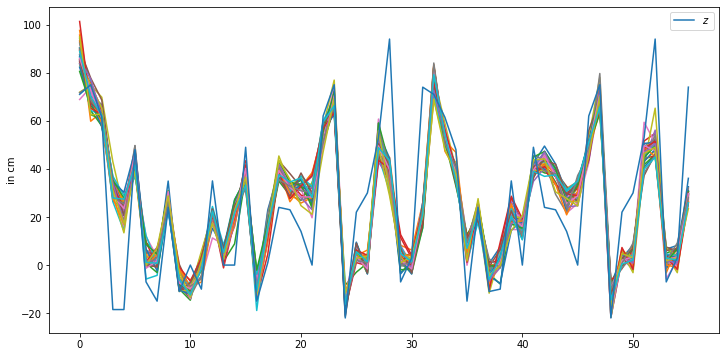

In [38]:
plt.figure(figsize=(12,6))
#plt.xlim(0,25)
#plt.ylim(-20,50)
#for i in range(0,rep):
    #plt.plot(v_pre_z[:][i])
plt.plot(v_pre_z)
plt.plot(z_teste,label=r"$z$")
plt.ylabel("in cm")
plt.legend(loc="best")
#plt.axhline(y=0)
plt.savefig('z_fit_rep.png')

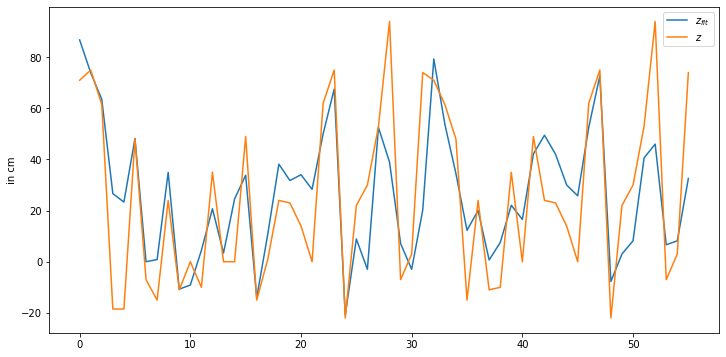

In [39]:
plt.figure(figsize=(12,6))
#plt.xlim(0,25)
#plt.ylim(-20,50)
#for i in range(0,rep):
    #plt.plot(v_pre_z[:][i])
plt.plot(v_pre_z[:,0],label=r"$z_{fit}$")
plt.plot(z_teste,label=r"$z$")
plt.ylabel("in cm")
plt.legend(loc="best")
#plt.axhline(y=0)
plt.savefig('z_fit_teste.png')

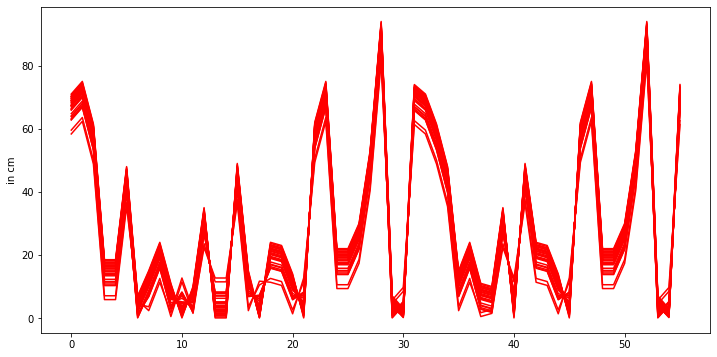

In [42]:
plt.figure(figsize=(12,6))
for i in range(0,rep):
    diff = np.abs(np.abs(v_pre_z[:][i])- np.abs(z_teste))

plt.plot(diff , c = 'r')

#plt.xlim(0,25)
#plt.ylim(-20,50)
#plt.plot(np.abs(val_prev_z-z_teste),label=r"$z_{fit}$")
plt.ylabel("in cm")
#plt.legend(loc="best")
#plt.axhline(y=0)
plt.savefig('diffz.png')

## Fit $\theta$

In [8]:
colunas = ['x','y','z','theta','phi']
data = pd.read_csv('data-optical-design (1).csv', usecols= colunas)
data.head()

,x,y,z,theta,phi
0,-960,-388,71.0,9.37,26.3
1,-960,0,75.0,9.50,0.0
2,-840,-194,61.5,7.88,5.5
3,-600,-194,-18.5,6.12,16.3
4,-600,194,-18.5,6.12,-16.3


In [9]:
scaler3 = StandardScaler()
scaler4 = StandardScaler()
data[['x','y','z']] = scaler3.fit_transform(data[['x','y','z']])
data[['theta']] = scaler4.fit_transform(data[['theta']])
X_theta = data[['x','y','z']]
y_theta = data['theta']
data.head()

,x,y,z,theta,phi
0,-2.015486,-1.126390,1.374188,2.305600,26.3
1,-2.015486,0.000000,1.494242,2.364335,0.0
2,-1.720717,-0.563195,1.089060,1.632404,5.5
3,-1.131178,-0.563195,-1.312017,0.837219,16.3
4,-1.131178,0.563195,-1.312017,0.837219,-16.3


In [10]:
col_theta = ['x','y','z']

In [11]:
colunas_theta = [tf.feature_column.numeric_column(key = c) for c in col_theta]
colunas_theta

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='y', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='z', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [14]:
from sklearn.model_selection import train_test_split
X_train_t,X_test_t,y_train_t,y_test_t = train_test_split(X_theta,y_theta,test_size = 0.1588989523435)

In [15]:
rep = 30
v_pre_theta = np.ones([X_theta.shape[0],rep])
for j in tqdm(range(rep)):
    fn_theta = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train_t, y = y_train_t, batch_size= 8,
                                                   num_epochs= None, shuffle= True)
    reg_theta = tf.estimator.DNNRegressor(hidden_units=[10], feature_columns=colunas_theta,
                                  activation_fn=tf.nn.relu, optimizer='Adam')
    reg_theta.train(input_fn = fn_theta, steps = 20000)
    fn_prev_theta = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_theta, shuffle = False)
    #prev_z = reg_z.predict(input_fn=fn_prev_z)
    val_prev_theta= []
    for p in reg_theta.predict(input_fn=fn_prev_theta):
        val_prev_theta.append(p['predictions'][0])
    aux = np.asarray(val_prev_theta).reshape(-1,1)
    for i in tqdm(range(0,X_z.shape[0])):
        aux = np.asarray(val_prev_theta).reshape(-1,1)
        v_pre_theta[i][j] = aux[i][:]
            

  0%|          | 0/30 [00:00<?, ?it/s]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8aqm21x5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

INFO:tensorflow:loss = 0.055465043, step = 3000 (0.164 sec)
INFO:tensorflow:global_step/sec: 623.944
INFO:tensorflow:loss = 0.08973096, step = 3100 (0.161 sec)
INFO:tensorflow:global_step/sec: 642.64
INFO:tensorflow:loss = 0.019701803, step = 3200 (0.155 sec)
INFO:tensorflow:global_step/sec: 630.905
INFO:tensorflow:loss = 0.021751039, step = 3300 (0.158 sec)
INFO:tensorflow:global_step/sec: 640.57
INFO:tensorflow:loss = 0.05385028, step = 3400 (0.158 sec)
INFO:tensorflow:global_step/sec: 633.25
INFO:tensorflow:loss = 0.050074376, step = 3500 (0.157 sec)
INFO:tensorflow:global_step/sec: 632.496
INFO:tensorflow:loss = 0.040200695, step = 3600 (0.158 sec)
INFO:tensorflow:global_step/sec: 628.363
INFO:tensorflow:loss = 0.04510004, step = 3700 (0.159 sec)
INFO:tensorflow:global_step/sec: 632.471
INFO:tensorflow:loss = 0.04434916, step = 3800 (0.158 sec)
INFO:tensorflow:global_step/sec: 632.019
INFO:tensorflow:loss = 0.0073470734, step = 3900 (0.158 sec)
INFO:tensorflow:global_step/sec: 634.

INFO:tensorflow:global_step/sec: 631.186
INFO:tensorflow:loss = 0.013442815, step = 11200 (0.159 sec)
INFO:tensorflow:global_step/sec: 543.642
INFO:tensorflow:loss = 0.017411124, step = 11300 (0.184 sec)
INFO:tensorflow:global_step/sec: 502.126
INFO:tensorflow:loss = 0.02177465, step = 11400 (0.202 sec)
INFO:tensorflow:global_step/sec: 548.74
INFO:tensorflow:loss = 0.009647737, step = 11500 (0.179 sec)
INFO:tensorflow:global_step/sec: 502.37
INFO:tensorflow:loss = 0.041460063, step = 11600 (0.201 sec)
INFO:tensorflow:global_step/sec: 375.655
INFO:tensorflow:loss = 0.018604001, step = 11700 (0.264 sec)
INFO:tensorflow:global_step/sec: 423.451
INFO:tensorflow:loss = 0.008318329, step = 11800 (0.236 sec)
INFO:tensorflow:global_step/sec: 475.725
INFO:tensorflow:loss = 0.0073576104, step = 11900 (0.214 sec)
INFO:tensorflow:global_step/sec: 397.254
INFO:tensorflow:loss = 0.01019051, step = 12000 (0.253 sec)
INFO:tensorflow:global_step/sec: 388.937
INFO:tensorflow:loss = 0.006284269, step = 1

INFO:tensorflow:global_step/sec: 631.838
INFO:tensorflow:loss = 0.021772735, step = 19300 (0.162 sec)
INFO:tensorflow:global_step/sec: 630.114
INFO:tensorflow:loss = 0.02595099, step = 19400 (0.157 sec)
INFO:tensorflow:global_step/sec: 614.785
INFO:tensorflow:loss = 0.0029115453, step = 19500 (0.160 sec)
INFO:tensorflow:global_step/sec: 635.339
INFO:tensorflow:loss = 0.011983209, step = 19600 (0.157 sec)
INFO:tensorflow:global_step/sec: 654.647
INFO:tensorflow:loss = 0.0020014304, step = 19700 (0.153 sec)
INFO:tensorflow:global_step/sec: 623.514
INFO:tensorflow:loss = 0.012174701, step = 19800 (0.161 sec)
INFO:tensorflow:global_step/sec: 445.508
INFO:tensorflow:loss = 0.012667194, step = 19900 (0.223 sec)
INFO:tensorflow:Saving checkpoints for 20000 into /tmp/tmp8aqm21x5/model.ckpt.
INFO:tensorflow:Loss for final step: 0.013093905.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely onl


  3%|▎         | 1/30 [00:41<20:08, 41.68s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpd_sgxio0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 634.466
INFO:tensorflow:loss = 0.031588547, step = 6300 (0.156 sec)
INFO:tensorflow:global_step/sec: 641.821
INFO:tensorflow:loss = 0.0060965004, step = 6400 (0.156 sec)
INFO:tensorflow:global_step/sec: 611.33
INFO:tensorflow:loss = 0.046782814, step = 6500 (0.163 sec)
INFO:tensorflow:global_step/sec: 638.708
INFO:tensorflow:loss = 0.023555279, step = 6600 (0.158 sec)
INFO:tensorflow:global_step/sec: 632.725
INFO:tensorflow:loss = 0.002364137, step = 6700 (0.157 sec)
INFO:tensorflow:global_step/sec: 598.816
INFO:tensorflow:loss = 0.0013830027, step = 6800 (0.168 sec)
INFO:tensorflow:global_step/sec: 640.274
INFO:tensorflow:loss = 0.0022202905, step = 6900 (0.155 sec)
INFO:tensorflow:global_step/sec: 691.852
INFO:tensorflow:loss = 0.020806417, step = 7000 (0.147 sec)
INFO:tensorflow:global_step/sec: 624.087
INFO:tensorflow:loss = 0.015120982, step = 7100 (0.161 sec)
INFO:tensorflow:global_step/sec: 637.754
INFO:tensorflow:loss = 0.0063846842, step = 7200

INFO:tensorflow:global_step/sec: 670.944
INFO:tensorflow:loss = 0.0009922327, step = 14400 (0.149 sec)
INFO:tensorflow:global_step/sec: 687.53
INFO:tensorflow:loss = 0.02047022, step = 14500 (0.146 sec)
INFO:tensorflow:global_step/sec: 641.493
INFO:tensorflow:loss = 0.012030936, step = 14600 (0.156 sec)
INFO:tensorflow:global_step/sec: 660.221
INFO:tensorflow:loss = 0.0059540337, step = 14700 (0.151 sec)
INFO:tensorflow:global_step/sec: 651.79
INFO:tensorflow:loss = 0.007221147, step = 14800 (0.155 sec)
INFO:tensorflow:global_step/sec: 596.235
INFO:tensorflow:loss = 0.0022067348, step = 14900 (0.166 sec)
INFO:tensorflow:global_step/sec: 584.639
INFO:tensorflow:loss = 0.013008088, step = 15000 (0.174 sec)
INFO:tensorflow:global_step/sec: 585.677
INFO:tensorflow:loss = 0.008396553, step = 15100 (0.168 sec)
INFO:tensorflow:global_step/sec: 655.199
INFO:tensorflow:loss = 0.014434125, step = 15200 (0.153 sec)
INFO:tensorflow:global_step/sec: 674.047
INFO:tensorflow:loss = 0.011746433, step 


  7%|▋         | 2/30 [01:16<18:31, 39.70s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmphgocv023', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 667.29
INFO:tensorflow:loss = 0.010078502, step = 6300 (0.150 sec)
INFO:tensorflow:global_step/sec: 666.241
INFO:tensorflow:loss = 0.019665433, step = 6400 (0.150 sec)
INFO:tensorflow:global_step/sec: 640.147
INFO:tensorflow:loss = 0.008180993, step = 6500 (0.158 sec)
INFO:tensorflow:global_step/sec: 672.855
INFO:tensorflow:loss = 0.04785718, step = 6600 (0.148 sec)
INFO:tensorflow:global_step/sec: 672.454
INFO:tensorflow:loss = 0.0134459585, step = 6700 (0.150 sec)
INFO:tensorflow:global_step/sec: 586.963
INFO:tensorflow:loss = 0.037412345, step = 6800 (0.169 sec)
INFO:tensorflow:global_step/sec: 675.391
INFO:tensorflow:loss = 0.032403797, step = 6900 (0.148 sec)
INFO:tensorflow:global_step/sec: 660.427
INFO:tensorflow:loss = 0.010385367, step = 7000 (0.151 sec)
INFO:tensorflow:global_step/sec: 648.6
INFO:tensorflow:loss = 0.0043456694, step = 7100 (0.154 sec)
INFO:tensorflow:global_step/sec: 671.581
INFO:tensorflow:loss = 0.014697273, step = 7200 (0.1

INFO:tensorflow:global_step/sec: 649.608
INFO:tensorflow:loss = 0.0044102, step = 14400 (0.153 sec)
INFO:tensorflow:global_step/sec: 661.724
INFO:tensorflow:loss = 0.0036375741, step = 14500 (0.152 sec)
INFO:tensorflow:global_step/sec: 643.796
INFO:tensorflow:loss = 0.023131056, step = 14600 (0.155 sec)
INFO:tensorflow:global_step/sec: 657.043
INFO:tensorflow:loss = 0.0075084744, step = 14700 (0.152 sec)
INFO:tensorflow:global_step/sec: 641.052
INFO:tensorflow:loss = 0.016835487, step = 14800 (0.156 sec)
INFO:tensorflow:global_step/sec: 616.618
INFO:tensorflow:loss = 0.0025047206, step = 14900 (0.162 sec)
INFO:tensorflow:global_step/sec: 620.952
INFO:tensorflow:loss = 0.0038148495, step = 15000 (0.161 sec)
INFO:tensorflow:global_step/sec: 656.666
INFO:tensorflow:loss = 0.009204369, step = 15100 (0.152 sec)
INFO:tensorflow:global_step/sec: 641.219
INFO:tensorflow:loss = 0.014660715, step = 15200 (0.157 sec)
INFO:tensorflow:global_step/sec: 650.019
INFO:tensorflow:loss = 0.005718084, ste


 10%|█         | 3/30 [01:48<16:44, 37.21s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxkoptag_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 690.433
INFO:tensorflow:loss = 0.014935015, step = 6300 (0.146 sec)
INFO:tensorflow:global_step/sec: 648.724
INFO:tensorflow:loss = 0.0062234513, step = 6400 (0.155 sec)
INFO:tensorflow:global_step/sec: 663.96
INFO:tensorflow:loss = 0.02782164, step = 6500 (0.148 sec)
INFO:tensorflow:global_step/sec: 687.127
INFO:tensorflow:loss = 0.023772212, step = 6600 (0.146 sec)
INFO:tensorflow:global_step/sec: 687.234
INFO:tensorflow:loss = 0.011244758, step = 6700 (0.147 sec)
INFO:tensorflow:global_step/sec: 652.708
INFO:tensorflow:loss = 0.018961377, step = 6800 (0.152 sec)
INFO:tensorflow:global_step/sec: 683.83
INFO:tensorflow:loss = 0.02206413, step = 6900 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.28
INFO:tensorflow:loss = 0.0051710336, step = 7000 (0.145 sec)
INFO:tensorflow:global_step/sec: 693.26
INFO:tensorflow:loss = 0.03532043, step = 7100 (0.144 sec)
INFO:tensorflow:global_step/sec: 643.758
INFO:tensorflow:loss = 0.027483761, step = 7200 (0.154 

INFO:tensorflow:global_step/sec: 653.763
INFO:tensorflow:loss = 0.015151388, step = 14400 (0.153 sec)
INFO:tensorflow:global_step/sec: 671.111
INFO:tensorflow:loss = 0.005991957, step = 14500 (0.150 sec)
INFO:tensorflow:global_step/sec: 675.71
INFO:tensorflow:loss = 0.00517031, step = 14600 (0.147 sec)
INFO:tensorflow:global_step/sec: 660.168
INFO:tensorflow:loss = 0.027852368, step = 14700 (0.150 sec)
INFO:tensorflow:global_step/sec: 655.52
INFO:tensorflow:loss = 0.009488186, step = 14800 (0.153 sec)
INFO:tensorflow:global_step/sec: 677.88
INFO:tensorflow:loss = 0.008768616, step = 14900 (0.146 sec)
INFO:tensorflow:global_step/sec: 677.687
INFO:tensorflow:loss = 0.035923522, step = 15000 (0.148 sec)
INFO:tensorflow:global_step/sec: 679.985
INFO:tensorflow:loss = 0.009034104, step = 15100 (0.148 sec)
INFO:tensorflow:global_step/sec: 630.007
INFO:tensorflow:loss = 0.015685372, step = 15200 (0.159 sec)
INFO:tensorflow:global_step/sec: 672.409
INFO:tensorflow:loss = 0.0057923207, step = 1


 13%|█▎        | 4/30 [02:19<15:18, 35.31s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpu2ymckd8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 674.282
INFO:tensorflow:loss = 0.0127990525, step = 6300 (0.148 sec)
INFO:tensorflow:global_step/sec: 656.502
INFO:tensorflow:loss = 0.015031579, step = 6400 (0.152 sec)
INFO:tensorflow:global_step/sec: 695.717
INFO:tensorflow:loss = 0.007699659, step = 6500 (0.144 sec)
INFO:tensorflow:global_step/sec: 668.433
INFO:tensorflow:loss = 0.025423635, step = 6600 (0.150 sec)
INFO:tensorflow:global_step/sec: 676.13
INFO:tensorflow:loss = 0.0037360531, step = 6700 (0.148 sec)
INFO:tensorflow:global_step/sec: 669.167
INFO:tensorflow:loss = 0.015307698, step = 6800 (0.149 sec)
INFO:tensorflow:global_step/sec: 678.858
INFO:tensorflow:loss = 0.010940332, step = 6900 (0.147 sec)
INFO:tensorflow:global_step/sec: 680.886
INFO:tensorflow:loss = 0.0037256556, step = 7000 (0.148 sec)
INFO:tensorflow:global_step/sec: 684.324
INFO:tensorflow:loss = 0.026659403, step = 7100 (0.145 sec)
INFO:tensorflow:global_step/sec: 645.125
INFO:tensorflow:loss = 0.022543361, step = 7200 

INFO:tensorflow:global_step/sec: 655.984
INFO:tensorflow:loss = 0.011585053, step = 14400 (0.153 sec)
INFO:tensorflow:global_step/sec: 676.464
INFO:tensorflow:loss = 0.006985595, step = 14500 (0.148 sec)
INFO:tensorflow:global_step/sec: 649.824
INFO:tensorflow:loss = 0.013951191, step = 14600 (0.154 sec)
INFO:tensorflow:global_step/sec: 667.094
INFO:tensorflow:loss = 0.019179465, step = 14700 (0.150 sec)
INFO:tensorflow:global_step/sec: 665.231
INFO:tensorflow:loss = 0.0063361367, step = 14800 (0.150 sec)
INFO:tensorflow:global_step/sec: 686.844
INFO:tensorflow:loss = 0.0099201575, step = 14900 (0.146 sec)
INFO:tensorflow:global_step/sec: 685.283
INFO:tensorflow:loss = 0.018910212, step = 15000 (0.146 sec)
INFO:tensorflow:global_step/sec: 688.828
INFO:tensorflow:loss = 0.009949664, step = 15100 (0.145 sec)
INFO:tensorflow:global_step/sec: 643.211
INFO:tensorflow:loss = 0.006928253, step = 15200 (0.155 sec)
INFO:tensorflow:global_step/sec: 683.345
INFO:tensorflow:loss = 0.018273685, ste


 17%|█▋        | 5/30 [02:50<14:10, 34.03s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpioeml5eq', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:loss = 0.006803763, step = 6200 (0.150 sec)
INFO:tensorflow:global_step/sec: 646.563
INFO:tensorflow:loss = 0.0054177996, step = 6300 (0.156 sec)
INFO:tensorflow:global_step/sec: 679.364
INFO:tensorflow:loss = 0.0186856, step = 6400 (0.146 sec)
INFO:tensorflow:global_step/sec: 685.871
INFO:tensorflow:loss = 0.011747985, step = 6500 (0.147 sec)
INFO:tensorflow:global_step/sec: 669.005
INFO:tensorflow:loss = 0.009065968, step = 6600 (0.149 sec)
INFO:tensorflow:global_step/sec: 679.873
INFO:tensorflow:loss = 0.006669556, step = 6700 (0.148 sec)
INFO:tensorflow:global_step/sec: 655.452
INFO:tensorflow:loss = 0.005789521, step = 6800 (0.151 sec)
INFO:tensorflow:global_step/sec: 671.695
INFO:tensorflow:loss = 0.006087374, step = 6900 (0.149 sec)
INFO:tensorflow:global_step/sec: 685.466
INFO:tensorflow:loss = 0.0020224084, step = 7000 (0.147 sec)
INFO:tensorflow:global_step/sec: 671.276
INFO:tensorflow:loss = 0.0075585637, step = 7100 (0.149 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:loss = 0.013658997, step = 14300 (0.147 sec)
INFO:tensorflow:global_step/sec: 638.483
INFO:tensorflow:loss = 0.019791089, step = 14400 (0.154 sec)
INFO:tensorflow:global_step/sec: 678.103
INFO:tensorflow:loss = 0.0127386525, step = 14500 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.842
INFO:tensorflow:loss = 0.014931249, step = 14600 (0.145 sec)
INFO:tensorflow:global_step/sec: 687.973
INFO:tensorflow:loss = 0.017320912, step = 14700 (0.145 sec)
INFO:tensorflow:global_step/sec: 635.814
INFO:tensorflow:loss = 0.005106441, step = 14800 (0.156 sec)
INFO:tensorflow:global_step/sec: 658.228
INFO:tensorflow:loss = 0.008041533, step = 14900 (0.152 sec)
INFO:tensorflow:global_step/sec: 684.089
INFO:tensorflow:loss = 0.027641637, step = 15000 (0.147 sec)
INFO:tensorflow:global_step/sec: 668.757
INFO:tensorflow:loss = 0.021420805, step = 15100 (0.148 sec)
INFO:tensorflow:global_step/sec: 459.327
INFO:tensorflow:loss = 0.028472897, step = 15200 (0.217 sec)
INFO:tensorflow:glob


 20%|██        | 6/30 [03:20<13:12, 33.03s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpkhjrootl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 666.176
INFO:tensorflow:loss = 0.0066764145, step = 6300 (0.151 sec)
INFO:tensorflow:global_step/sec: 684.872
INFO:tensorflow:loss = 0.035801135, step = 6400 (0.148 sec)
INFO:tensorflow:global_step/sec: 686.769
INFO:tensorflow:loss = 0.016393833, step = 6500 (0.145 sec)
INFO:tensorflow:global_step/sec: 670.892
INFO:tensorflow:loss = 0.010664793, step = 6600 (0.149 sec)
INFO:tensorflow:global_step/sec: 667.347
INFO:tensorflow:loss = 0.0123165175, step = 6700 (0.151 sec)
INFO:tensorflow:global_step/sec: 671.908
INFO:tensorflow:loss = 0.036320314, step = 6800 (0.146 sec)
INFO:tensorflow:global_step/sec: 669.788
INFO:tensorflow:loss = 0.002126751, step = 6900 (0.149 sec)
INFO:tensorflow:global_step/sec: 683.611
INFO:tensorflow:loss = 0.025954707, step = 7000 (0.146 sec)
INFO:tensorflow:global_step/sec: 668.072
INFO:tensorflow:loss = 0.004956345, step = 7100 (0.151 sec)
INFO:tensorflow:global_step/sec: 683.026
INFO:tensorflow:loss = 0.006363059, step = 7200 

INFO:tensorflow:global_step/sec: 655.46
INFO:tensorflow:loss = 0.025191488, step = 14400 (0.153 sec)
INFO:tensorflow:global_step/sec: 660.481
INFO:tensorflow:loss = 0.014493056, step = 14500 (0.151 sec)
INFO:tensorflow:global_step/sec: 673.873
INFO:tensorflow:loss = 0.013834035, step = 14600 (0.148 sec)
INFO:tensorflow:global_step/sec: 688.8
INFO:tensorflow:loss = 0.014784269, step = 14700 (0.147 sec)
INFO:tensorflow:global_step/sec: 643.416
INFO:tensorflow:loss = 0.005576728, step = 14800 (0.153 sec)
INFO:tensorflow:global_step/sec: 686.417
INFO:tensorflow:loss = 0.017753467, step = 14900 (0.148 sec)
INFO:tensorflow:global_step/sec: 686.678
INFO:tensorflow:loss = 0.05497437, step = 15000 (0.143 sec)
INFO:tensorflow:global_step/sec: 652.037
INFO:tensorflow:loss = 0.01228931, step = 15100 (0.153 sec)
INFO:tensorflow:global_step/sec: 656.037
INFO:tensorflow:loss = 0.046630476, step = 15200 (0.152 sec)
INFO:tensorflow:global_step/sec: 695.38
INFO:tensorflow:loss = 0.0051386585, step = 153


 23%|██▎       | 7/30 [03:51<12:22, 32.29s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdx9brqq1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 649.11
INFO:tensorflow:loss = 0.0076675355, step = 6300 (0.154 sec)
INFO:tensorflow:global_step/sec: 679.24
INFO:tensorflow:loss = 0.029098056, step = 6400 (0.147 sec)
INFO:tensorflow:global_step/sec: 674.985
INFO:tensorflow:loss = 0.025945667, step = 6500 (0.149 sec)
INFO:tensorflow:global_step/sec: 673.673
INFO:tensorflow:loss = 0.036532395, step = 6600 (0.148 sec)
INFO:tensorflow:global_step/sec: 669.747
INFO:tensorflow:loss = 0.011746731, step = 6700 (0.153 sec)
INFO:tensorflow:global_step/sec: 655.831
INFO:tensorflow:loss = 0.02553017, step = 6800 (0.149 sec)
INFO:tensorflow:global_step/sec: 637.889
INFO:tensorflow:loss = 0.022114716, step = 6900 (0.158 sec)
INFO:tensorflow:global_step/sec: 528.191
INFO:tensorflow:loss = 0.022260536, step = 7000 (0.190 sec)
INFO:tensorflow:global_step/sec: 671.614
INFO:tensorflow:loss = 0.03663619, step = 7100 (0.149 sec)
INFO:tensorflow:global_step/sec: 683.099
INFO:tensorflow:loss = 0.002385201, step = 7200 (0.14

INFO:tensorflow:global_step/sec: 672.591
INFO:tensorflow:loss = 0.018049568, step = 14400 (0.148 sec)
INFO:tensorflow:global_step/sec: 676.805
INFO:tensorflow:loss = 0.0054683867, step = 14500 (0.149 sec)
INFO:tensorflow:global_step/sec: 636.304
INFO:tensorflow:loss = 0.021647718, step = 14600 (0.157 sec)
INFO:tensorflow:global_step/sec: 669.493
INFO:tensorflow:loss = 0.0125299655, step = 14700 (0.149 sec)
INFO:tensorflow:global_step/sec: 686.55
INFO:tensorflow:loss = 0.02101919, step = 14800 (0.147 sec)
INFO:tensorflow:global_step/sec: 681.312
INFO:tensorflow:loss = 0.01784892, step = 14900 (0.146 sec)
INFO:tensorflow:global_step/sec: 660.156
INFO:tensorflow:loss = 0.0040529943, step = 15000 (0.151 sec)
INFO:tensorflow:global_step/sec: 669.674
INFO:tensorflow:loss = 0.007632154, step = 15100 (0.148 sec)
INFO:tensorflow:global_step/sec: 668.995
INFO:tensorflow:loss = 0.011881997, step = 15200 (0.150 sec)
INFO:tensorflow:global_step/sec: 690.624
INFO:tensorflow:loss = 0.016370732, step 


 27%|██▋       | 8/30 [04:22<11:41, 31.88s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpzafpyrbf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 685.376
INFO:tensorflow:loss = 0.033148043, step = 6300 (0.146 sec)
INFO:tensorflow:global_step/sec: 651.915
INFO:tensorflow:loss = 0.013877865, step = 6400 (0.154 sec)
INFO:tensorflow:global_step/sec: 658.729
INFO:tensorflow:loss = 0.0019941553, step = 6500 (0.151 sec)
INFO:tensorflow:global_step/sec: 671.815
INFO:tensorflow:loss = 0.0089244135, step = 6600 (0.149 sec)
INFO:tensorflow:global_step/sec: 654.189
INFO:tensorflow:loss = 0.0069140918, step = 6700 (0.153 sec)
INFO:tensorflow:global_step/sec: 662.542
INFO:tensorflow:loss = 0.018846702, step = 6800 (0.151 sec)
INFO:tensorflow:global_step/sec: 682.828
INFO:tensorflow:loss = 0.014028798, step = 6900 (0.147 sec)
INFO:tensorflow:global_step/sec: 693.9
INFO:tensorflow:loss = 0.0035668619, step = 7000 (0.144 sec)
INFO:tensorflow:global_step/sec: 698.056
INFO:tensorflow:loss = 0.004033629, step = 7100 (0.143 sec)
INFO:tensorflow:global_step/sec: 649.735
INFO:tensorflow:loss = 0.00329347, step = 7200 (

INFO:tensorflow:global_step/sec: 435.639
INFO:tensorflow:loss = 0.0063955626, step = 14400 (0.228 sec)
INFO:tensorflow:global_step/sec: 411.706
INFO:tensorflow:loss = 0.01943184, step = 14500 (0.251 sec)
INFO:tensorflow:global_step/sec: 364.785
INFO:tensorflow:loss = 0.004533429, step = 14600 (0.266 sec)
INFO:tensorflow:global_step/sec: 295.241
INFO:tensorflow:loss = 0.018048353, step = 14700 (0.339 sec)
INFO:tensorflow:global_step/sec: 575.297
INFO:tensorflow:loss = 0.0012062818, step = 14800 (0.174 sec)
INFO:tensorflow:global_step/sec: 564.271
INFO:tensorflow:loss = 0.0064750407, step = 14900 (0.177 sec)
INFO:tensorflow:global_step/sec: 520.779
INFO:tensorflow:loss = 0.028098105, step = 15000 (0.191 sec)
INFO:tensorflow:global_step/sec: 511.606
INFO:tensorflow:loss = 0.010430051, step = 15100 (0.197 sec)
INFO:tensorflow:global_step/sec: 413.348
INFO:tensorflow:loss = 0.018014958, step = 15200 (0.244 sec)
INFO:tensorflow:global_step/sec: 401.376
INFO:tensorflow:loss = 0.0017021578, st


 30%|███       | 9/30 [05:01<11:58, 34.20s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqxqoivkl', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 445.927
INFO:tensorflow:loss = 0.012919371, step = 6300 (0.223 sec)
INFO:tensorflow:global_step/sec: 604.15
INFO:tensorflow:loss = 0.023488147, step = 6400 (0.166 sec)
INFO:tensorflow:global_step/sec: 622.503
INFO:tensorflow:loss = 0.0035598641, step = 6500 (0.161 sec)
INFO:tensorflow:global_step/sec: 626.563
INFO:tensorflow:loss = 0.021453947, step = 6600 (0.160 sec)
INFO:tensorflow:global_step/sec: 624.877
INFO:tensorflow:loss = 0.025074624, step = 6700 (0.160 sec)
INFO:tensorflow:global_step/sec: 641.404
INFO:tensorflow:loss = 0.0138213355, step = 6800 (0.156 sec)
INFO:tensorflow:global_step/sec: 611.52
INFO:tensorflow:loss = 0.024655217, step = 6900 (0.163 sec)
INFO:tensorflow:global_step/sec: 580.832
INFO:tensorflow:loss = 0.038023584, step = 7000 (0.173 sec)
INFO:tensorflow:global_step/sec: 613.154
INFO:tensorflow:loss = 0.00555722, step = 7100 (0.162 sec)
INFO:tensorflow:global_step/sec: 584.557
INFO:tensorflow:loss = 0.013336859, step = 7200 (0.

INFO:tensorflow:global_step/sec: 609.489
INFO:tensorflow:loss = 0.01519058, step = 14400 (0.167 sec)
INFO:tensorflow:global_step/sec: 548.288
INFO:tensorflow:loss = 0.017468804, step = 14500 (0.179 sec)
INFO:tensorflow:global_step/sec: 578.074
INFO:tensorflow:loss = 0.05795478, step = 14600 (0.174 sec)
INFO:tensorflow:global_step/sec: 642.365
INFO:tensorflow:loss = 0.02407201, step = 14700 (0.156 sec)
INFO:tensorflow:global_step/sec: 539.911
INFO:tensorflow:loss = 0.007448859, step = 14800 (0.184 sec)
INFO:tensorflow:global_step/sec: 607.416
INFO:tensorflow:loss = 0.0124801975, step = 14900 (0.165 sec)
INFO:tensorflow:global_step/sec: 314.913
INFO:tensorflow:loss = 0.010545183, step = 15000 (0.322 sec)
INFO:tensorflow:global_step/sec: 300.773
INFO:tensorflow:loss = 0.012013413, step = 15100 (0.330 sec)
INFO:tensorflow:global_step/sec: 482.366
INFO:tensorflow:loss = 0.004279306, step = 15200 (0.205 sec)
INFO:tensorflow:global_step/sec: 597.062
INFO:tensorflow:loss = 0.010646634, step = 


 33%|███▎      | 10/30 [05:40<11:53, 35.67s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwsowvhl4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 531.113
INFO:tensorflow:loss = 0.0072494578, step = 6300 (0.190 sec)
INFO:tensorflow:global_step/sec: 497.469
INFO:tensorflow:loss = 0.004567083, step = 6400 (0.204 sec)
INFO:tensorflow:global_step/sec: 520.766
INFO:tensorflow:loss = 0.0010967781, step = 6500 (0.190 sec)
INFO:tensorflow:global_step/sec: 481.041
INFO:tensorflow:loss = 0.014416923, step = 6600 (0.208 sec)
INFO:tensorflow:global_step/sec: 516.435
INFO:tensorflow:loss = 0.0040458846, step = 6700 (0.193 sec)
INFO:tensorflow:global_step/sec: 529.046
INFO:tensorflow:loss = 0.009192664, step = 6800 (0.190 sec)
INFO:tensorflow:global_step/sec: 502.174
INFO:tensorflow:loss = 0.03063225, step = 6900 (0.203 sec)
INFO:tensorflow:global_step/sec: 518.898
INFO:tensorflow:loss = 0.025660595, step = 7000 (0.187 sec)
INFO:tensorflow:global_step/sec: 556.176
INFO:tensorflow:loss = 0.013298259, step = 7100 (0.182 sec)
INFO:tensorflow:global_step/sec: 490.031
INFO:tensorflow:loss = 0.004361656, step = 7200 

INFO:tensorflow:global_step/sec: 504.542
INFO:tensorflow:loss = 0.0065657124, step = 14400 (0.198 sec)
INFO:tensorflow:global_step/sec: 543.075
INFO:tensorflow:loss = 0.019731719, step = 14500 (0.185 sec)
INFO:tensorflow:global_step/sec: 502.936
INFO:tensorflow:loss = 0.0055484585, step = 14600 (0.198 sec)
INFO:tensorflow:global_step/sec: 536.196
INFO:tensorflow:loss = 0.027252212, step = 14700 (0.193 sec)
INFO:tensorflow:global_step/sec: 507.24
INFO:tensorflow:loss = 0.0119675, step = 14800 (0.191 sec)
INFO:tensorflow:global_step/sec: 487.669
INFO:tensorflow:loss = 0.006232009, step = 14900 (0.209 sec)
INFO:tensorflow:global_step/sec: 508.965
INFO:tensorflow:loss = 0.01574317, step = 15000 (0.194 sec)
INFO:tensorflow:global_step/sec: 508.672
INFO:tensorflow:loss = 0.011340669, step = 15100 (0.199 sec)
INFO:tensorflow:global_step/sec: 433.78
INFO:tensorflow:loss = 0.0065528327, step = 15200 (0.227 sec)
INFO:tensorflow:global_step/sec: 459.044
INFO:tensorflow:loss = 0.02088764, step = 1


 37%|███▋      | 11/30 [06:22<11:53, 37.56s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp95iazefr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 528.273
INFO:tensorflow:loss = 0.03593514, step = 6300 (0.188 sec)
INFO:tensorflow:global_step/sec: 538.168
INFO:tensorflow:loss = 0.062053293, step = 6400 (0.186 sec)
INFO:tensorflow:global_step/sec: 514.056
INFO:tensorflow:loss = 0.004673597, step = 6500 (0.194 sec)
INFO:tensorflow:global_step/sec: 522.893
INFO:tensorflow:loss = 0.024299685, step = 6600 (0.195 sec)
INFO:tensorflow:global_step/sec: 557.055
INFO:tensorflow:loss = 0.007261066, step = 6700 (0.183 sec)
INFO:tensorflow:global_step/sec: 489.823
INFO:tensorflow:loss = 0.025214298, step = 6800 (0.198 sec)
INFO:tensorflow:global_step/sec: 511.634
INFO:tensorflow:loss = 0.02591788, step = 6900 (0.195 sec)
INFO:tensorflow:global_step/sec: 538.888
INFO:tensorflow:loss = 0.01767005, step = 7000 (0.188 sec)
INFO:tensorflow:global_step/sec: 508.732
INFO:tensorflow:loss = 0.0095812725, step = 7100 (0.195 sec)
INFO:tensorflow:global_step/sec: 497.734
INFO:tensorflow:loss = 0.0202367, step = 7200 (0.201

INFO:tensorflow:global_step/sec: 539.146
INFO:tensorflow:loss = 0.004384659, step = 14400 (0.186 sec)
INFO:tensorflow:global_step/sec: 507.163
INFO:tensorflow:loss = 0.015091908, step = 14500 (0.197 sec)
INFO:tensorflow:global_step/sec: 506.994
INFO:tensorflow:loss = 0.00592761, step = 14600 (0.197 sec)
INFO:tensorflow:global_step/sec: 532.536
INFO:tensorflow:loss = 0.010199316, step = 14700 (0.188 sec)
INFO:tensorflow:global_step/sec: 535.922
INFO:tensorflow:loss = 0.007071833, step = 14800 (0.192 sec)
INFO:tensorflow:global_step/sec: 503.595
INFO:tensorflow:loss = 0.011287638, step = 14900 (0.193 sec)
INFO:tensorflow:global_step/sec: 531.532
INFO:tensorflow:loss = 0.005523819, step = 15000 (0.189 sec)
INFO:tensorflow:global_step/sec: 539.782
INFO:tensorflow:loss = 0.0100697195, step = 15100 (0.185 sec)
INFO:tensorflow:global_step/sec: 508.068
INFO:tensorflow:loss = 0.020075869, step = 15200 (0.199 sec)
INFO:tensorflow:global_step/sec: 515.1
INFO:tensorflow:loss = 0.006039045, step = 


 40%|████      | 12/30 [07:03<11:34, 38.58s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqx3mz878', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 437.754
INFO:tensorflow:loss = 0.012487164, step = 6300 (0.230 sec)
INFO:tensorflow:global_step/sec: 467.947
INFO:tensorflow:loss = 0.04275169, step = 6400 (0.213 sec)
INFO:tensorflow:global_step/sec: 499.349
INFO:tensorflow:loss = 0.015512734, step = 6500 (0.201 sec)
INFO:tensorflow:global_step/sec: 488.195
INFO:tensorflow:loss = 0.031060483, step = 6600 (0.205 sec)
INFO:tensorflow:global_step/sec: 540.643
INFO:tensorflow:loss = 0.03273724, step = 6700 (0.186 sec)
INFO:tensorflow:global_step/sec: 471.12
INFO:tensorflow:loss = 0.022821171, step = 6800 (0.211 sec)
INFO:tensorflow:global_step/sec: 494.967
INFO:tensorflow:loss = 0.017665524, step = 6900 (0.203 sec)
INFO:tensorflow:global_step/sec: 470.944
INFO:tensorflow:loss = 0.020178448, step = 7000 (0.211 sec)
INFO:tensorflow:global_step/sec: 486.593
INFO:tensorflow:loss = 0.012363811, step = 7100 (0.208 sec)
INFO:tensorflow:global_step/sec: 491.173
INFO:tensorflow:loss = 0.0073284535, step = 7200 (0.2

INFO:tensorflow:global_step/sec: 516.441
INFO:tensorflow:loss = 0.007481891, step = 14400 (0.194 sec)
INFO:tensorflow:global_step/sec: 536.209
INFO:tensorflow:loss = 0.01287064, step = 14500 (0.188 sec)
INFO:tensorflow:global_step/sec: 491.289
INFO:tensorflow:loss = 0.020350259, step = 14600 (0.202 sec)
INFO:tensorflow:global_step/sec: 545.935
INFO:tensorflow:loss = 0.01831862, step = 14700 (0.183 sec)
INFO:tensorflow:global_step/sec: 556.061
INFO:tensorflow:loss = 0.010625704, step = 14800 (0.180 sec)
INFO:tensorflow:global_step/sec: 566.171
INFO:tensorflow:loss = 0.021509692, step = 14900 (0.177 sec)
INFO:tensorflow:global_step/sec: 557.431
INFO:tensorflow:loss = 0.011535069, step = 15000 (0.182 sec)
INFO:tensorflow:global_step/sec: 545.235
INFO:tensorflow:loss = 0.01219284, step = 15100 (0.180 sec)
INFO:tensorflow:global_step/sec: 525.115
INFO:tensorflow:loss = 0.017874295, step = 15200 (0.191 sec)
INFO:tensorflow:global_step/sec: 542.837
INFO:tensorflow:loss = 0.007316066, step = 1


 43%|████▎     | 13/30 [07:43<11:00, 38.87s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplaar37i0', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 464.271
INFO:tensorflow:loss = 0.015641168, step = 6300 (0.215 sec)
INFO:tensorflow:global_step/sec: 475.947
INFO:tensorflow:loss = 0.023205653, step = 6400 (0.212 sec)
INFO:tensorflow:global_step/sec: 492.396
INFO:tensorflow:loss = 0.009402238, step = 6500 (0.204 sec)
INFO:tensorflow:global_step/sec: 487.749
INFO:tensorflow:loss = 0.007082222, step = 6600 (0.202 sec)
INFO:tensorflow:global_step/sec: 520.239
INFO:tensorflow:loss = 0.0027831632, step = 6700 (0.195 sec)
INFO:tensorflow:global_step/sec: 506.13
INFO:tensorflow:loss = 0.028417435, step = 6800 (0.194 sec)
INFO:tensorflow:global_step/sec: 535.545
INFO:tensorflow:loss = 0.009924578, step = 6900 (0.187 sec)
INFO:tensorflow:global_step/sec: 529.381
INFO:tensorflow:loss = 0.012997001, step = 7000 (0.189 sec)
INFO:tensorflow:global_step/sec: 501.484
INFO:tensorflow:loss = 0.010911503, step = 7100 (0.201 sec)
INFO:tensorflow:global_step/sec: 544.065
INFO:tensorflow:loss = 0.015529421, step = 7200 (0

INFO:tensorflow:global_step/sec: 481.342
INFO:tensorflow:loss = 0.02247449, step = 14400 (0.210 sec)
INFO:tensorflow:global_step/sec: 477.667
INFO:tensorflow:loss = 0.027314432, step = 14500 (0.207 sec)
INFO:tensorflow:global_step/sec: 480.749
INFO:tensorflow:loss = 0.0038425452, step = 14600 (0.211 sec)
INFO:tensorflow:global_step/sec: 464.387
INFO:tensorflow:loss = 0.013993563, step = 14700 (0.215 sec)
INFO:tensorflow:global_step/sec: 485.301
INFO:tensorflow:loss = 0.017833294, step = 14800 (0.203 sec)
INFO:tensorflow:global_step/sec: 418.702
INFO:tensorflow:loss = 0.020418655, step = 14900 (0.245 sec)
INFO:tensorflow:global_step/sec: 456.116
INFO:tensorflow:loss = 0.011503678, step = 15000 (0.215 sec)
INFO:tensorflow:global_step/sec: 529.04
INFO:tensorflow:loss = 0.011396667, step = 15100 (0.187 sec)
INFO:tensorflow:global_step/sec: 506.999
INFO:tensorflow:loss = 0.030042235, step = 15200 (0.200 sec)
INFO:tensorflow:global_step/sec: 500.128
INFO:tensorflow:loss = 0.004151301, step =


 47%|████▋     | 14/30 [08:23<10:29, 39.37s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpe0g097n6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 522.517
INFO:tensorflow:loss = 0.017758127, step = 6300 (0.191 sec)
INFO:tensorflow:global_step/sec: 496.041
INFO:tensorflow:loss = 0.010574519, step = 6400 (0.202 sec)
INFO:tensorflow:global_step/sec: 519.942
INFO:tensorflow:loss = 0.011355849, step = 6500 (0.193 sec)
INFO:tensorflow:global_step/sec: 496.985
INFO:tensorflow:loss = 0.01255945, step = 6600 (0.202 sec)
INFO:tensorflow:global_step/sec: 482.234
INFO:tensorflow:loss = 0.0066785775, step = 6700 (0.206 sec)
INFO:tensorflow:global_step/sec: 495.844
INFO:tensorflow:loss = 0.0140881, step = 6800 (0.204 sec)
INFO:tensorflow:global_step/sec: 502.437
INFO:tensorflow:loss = 0.0022886249, step = 6900 (0.197 sec)
INFO:tensorflow:global_step/sec: 518.518
INFO:tensorflow:loss = 0.012455248, step = 7000 (0.194 sec)
INFO:tensorflow:global_step/sec: 527.573
INFO:tensorflow:loss = 0.014206167, step = 7100 (0.189 sec)
INFO:tensorflow:global_step/sec: 511.328
INFO:tensorflow:loss = 0.02406318, step = 7200 (0.1

INFO:tensorflow:global_step/sec: 515.992
INFO:tensorflow:loss = 0.018768955, step = 14400 (0.193 sec)
INFO:tensorflow:global_step/sec: 521.341
INFO:tensorflow:loss = 0.011210781, step = 14500 (0.192 sec)
INFO:tensorflow:global_step/sec: 524.617
INFO:tensorflow:loss = 0.020818565, step = 14600 (0.191 sec)
INFO:tensorflow:global_step/sec: 536.561
INFO:tensorflow:loss = 0.0030637474, step = 14700 (0.188 sec)
INFO:tensorflow:global_step/sec: 482.33
INFO:tensorflow:loss = 0.016318377, step = 14800 (0.206 sec)
INFO:tensorflow:global_step/sec: 525.781
INFO:tensorflow:loss = 0.0051672105, step = 14900 (0.191 sec)
INFO:tensorflow:global_step/sec: 525.829
INFO:tensorflow:loss = 0.010718364, step = 15000 (0.189 sec)
INFO:tensorflow:global_step/sec: 518.748
INFO:tensorflow:loss = 0.006647693, step = 15100 (0.193 sec)
INFO:tensorflow:global_step/sec: 537.949
INFO:tensorflow:loss = 0.01382871, step = 15200 (0.186 sec)
INFO:tensorflow:global_step/sec: 510.007
INFO:tensorflow:loss = 0.009999715, step 


 50%|█████     | 15/30 [09:04<09:57, 39.85s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqti3layy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 530.816
INFO:tensorflow:loss = 0.012004233, step = 6300 (0.191 sec)
INFO:tensorflow:global_step/sec: 507.078
INFO:tensorflow:loss = 0.019640995, step = 6400 (0.195 sec)
INFO:tensorflow:global_step/sec: 476.87
INFO:tensorflow:loss = 0.007621522, step = 6500 (0.210 sec)
INFO:tensorflow:global_step/sec: 545.222
INFO:tensorflow:loss = 0.013612786, step = 6600 (0.187 sec)
INFO:tensorflow:global_step/sec: 487.143
INFO:tensorflow:loss = 0.002104499, step = 6700 (0.202 sec)
INFO:tensorflow:global_step/sec: 519.977
INFO:tensorflow:loss = 0.009774443, step = 6800 (0.194 sec)
INFO:tensorflow:global_step/sec: 529.073
INFO:tensorflow:loss = 0.022770049, step = 6900 (0.188 sec)
INFO:tensorflow:global_step/sec: 507.227
INFO:tensorflow:loss = 0.003228174, step = 7000 (0.198 sec)
INFO:tensorflow:global_step/sec: 535.767
INFO:tensorflow:loss = 0.013433194, step = 7100 (0.192 sec)
INFO:tensorflow:global_step/sec: 480.008
INFO:tensorflow:loss = 0.005543497, step = 7200 (0.

INFO:tensorflow:global_step/sec: 519.22
INFO:tensorflow:loss = 0.0011804367, step = 14400 (0.191 sec)
INFO:tensorflow:global_step/sec: 489.865
INFO:tensorflow:loss = 0.024740472, step = 14500 (0.210 sec)
INFO:tensorflow:global_step/sec: 511.922
INFO:tensorflow:loss = 0.020007256, step = 14600 (0.190 sec)
INFO:tensorflow:global_step/sec: 516.599
INFO:tensorflow:loss = 0.017527858, step = 14700 (0.195 sec)
INFO:tensorflow:global_step/sec: 497.417
INFO:tensorflow:loss = 0.0015009847, step = 14800 (0.202 sec)
INFO:tensorflow:global_step/sec: 515.239
INFO:tensorflow:loss = 0.0022592307, step = 14900 (0.193 sec)
INFO:tensorflow:global_step/sec: 526.916
INFO:tensorflow:loss = 0.005890663, step = 15000 (0.189 sec)
INFO:tensorflow:global_step/sec: 513.787
INFO:tensorflow:loss = 0.008913486, step = 15100 (0.196 sec)
INFO:tensorflow:global_step/sec: 516.682
INFO:tensorflow:loss = 0.0012377631, step = 15200 (0.193 sec)
INFO:tensorflow:global_step/sec: 520.975
INFO:tensorflow:loss = 0.007566766, st


 53%|█████▎    | 16/30 [09:45<09:20, 40.06s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpupufcp0e', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 497.344
INFO:tensorflow:loss = 0.046958826, step = 6300 (0.200 sec)
INFO:tensorflow:global_step/sec: 504.215
INFO:tensorflow:loss = 0.019862859, step = 6400 (0.198 sec)
INFO:tensorflow:global_step/sec: 508.82
INFO:tensorflow:loss = 0.0051688794, step = 6500 (0.198 sec)
INFO:tensorflow:global_step/sec: 533.158
INFO:tensorflow:loss = 0.01917127, step = 6600 (0.187 sec)
INFO:tensorflow:global_step/sec: 512.559
INFO:tensorflow:loss = 0.009903556, step = 6700 (0.196 sec)
INFO:tensorflow:global_step/sec: 483.215
INFO:tensorflow:loss = 0.014038972, step = 6800 (0.206 sec)
INFO:tensorflow:global_step/sec: 521.768
INFO:tensorflow:loss = 0.019113844, step = 6900 (0.193 sec)
INFO:tensorflow:global_step/sec: 518.583
INFO:tensorflow:loss = 0.024084885, step = 7000 (0.193 sec)
INFO:tensorflow:global_step/sec: 488.605
INFO:tensorflow:loss = 0.025205253, step = 7100 (0.204 sec)
INFO:tensorflow:global_step/sec: 512.027
INFO:tensorflow:loss = 0.029124197, step = 7200 (0.

INFO:tensorflow:global_step/sec: 521.893
INFO:tensorflow:loss = 0.0056289895, step = 14400 (0.192 sec)
INFO:tensorflow:global_step/sec: 506.257
INFO:tensorflow:loss = 0.022789279, step = 14500 (0.196 sec)
INFO:tensorflow:global_step/sec: 502.002
INFO:tensorflow:loss = 0.0036681432, step = 14601 (0.203 sec)
INFO:tensorflow:global_step/sec: 496.594
INFO:tensorflow:loss = 0.012011474, step = 14700 (0.197 sec)
INFO:tensorflow:global_step/sec: 515.586
INFO:tensorflow:loss = 0.025267676, step = 14800 (0.194 sec)
INFO:tensorflow:global_step/sec: 430.456
INFO:tensorflow:loss = 0.009371898, step = 14900 (0.234 sec)
INFO:tensorflow:global_step/sec: 531.622
INFO:tensorflow:loss = 0.0050360374, step = 15000 (0.186 sec)
INFO:tensorflow:global_step/sec: 524.497
INFO:tensorflow:loss = 0.024202464, step = 15100 (0.191 sec)
INFO:tensorflow:global_step/sec: 489.37
INFO:tensorflow:loss = 0.016924813, step = 15200 (0.205 sec)
INFO:tensorflow:global_step/sec: 515.341
INFO:tensorflow:loss = 0.020642776, ste


 57%|█████▋    | 17/30 [10:26<08:43, 40.29s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpkxmiwe_l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 429.298
INFO:tensorflow:loss = 0.016570067, step = 6300 (0.234 sec)
INFO:tensorflow:global_step/sec: 509.482
INFO:tensorflow:loss = 0.0133343665, step = 6400 (0.195 sec)
INFO:tensorflow:global_step/sec: 661.641
INFO:tensorflow:loss = 0.004837279, step = 6500 (0.150 sec)
INFO:tensorflow:global_step/sec: 562.922
INFO:tensorflow:loss = 0.0074786562, step = 6600 (0.178 sec)
INFO:tensorflow:global_step/sec: 574.824
INFO:tensorflow:loss = 0.020381732, step = 6700 (0.174 sec)
INFO:tensorflow:global_step/sec: 620.043
INFO:tensorflow:loss = 0.012934475, step = 6800 (0.161 sec)
INFO:tensorflow:global_step/sec: 580.427
INFO:tensorflow:loss = 0.008080573, step = 6900 (0.173 sec)
INFO:tensorflow:global_step/sec: 551.243
INFO:tensorflow:loss = 0.023780843, step = 7000 (0.181 sec)
INFO:tensorflow:global_step/sec: 657.352
INFO:tensorflow:loss = 0.023800842, step = 7100 (0.152 sec)
INFO:tensorflow:global_step/sec: 567.904
INFO:tensorflow:loss = 0.024343185, step = 7200 

INFO:tensorflow:global_step/sec: 499.72
INFO:tensorflow:loss = 0.003056666, step = 14400 (0.203 sec)
INFO:tensorflow:global_step/sec: 512.395
INFO:tensorflow:loss = 0.002670426, step = 14500 (0.191 sec)
INFO:tensorflow:global_step/sec: 501.197
INFO:tensorflow:loss = 0.010981942, step = 14600 (0.200 sec)
INFO:tensorflow:global_step/sec: 507.671
INFO:tensorflow:loss = 0.019389065, step = 14700 (0.197 sec)
INFO:tensorflow:global_step/sec: 421.814
INFO:tensorflow:loss = 0.024223458, step = 14800 (0.237 sec)
INFO:tensorflow:global_step/sec: 474.085
INFO:tensorflow:loss = 0.0016988304, step = 14900 (0.213 sec)
INFO:tensorflow:global_step/sec: 502.789
INFO:tensorflow:loss = 0.007884883, step = 15000 (0.199 sec)
INFO:tensorflow:global_step/sec: 482.492
INFO:tensorflow:loss = 0.007819787, step = 15100 (0.206 sec)
INFO:tensorflow:global_step/sec: 635.787
INFO:tensorflow:loss = 0.026226467, step = 15200 (0.156 sec)
INFO:tensorflow:global_step/sec: 668.192
INFO:tensorflow:loss = 0.010759199, step 


 60%|██████    | 18/30 [11:07<08:07, 40.66s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2d4d26f7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 568.054
INFO:tensorflow:loss = 0.011382103, step = 6300 (0.175 sec)
INFO:tensorflow:global_step/sec: 561.752
INFO:tensorflow:loss = 0.016727127, step = 6400 (0.177 sec)
INFO:tensorflow:global_step/sec: 314.176
INFO:tensorflow:loss = 0.015662609, step = 6500 (0.325 sec)
INFO:tensorflow:global_step/sec: 328.608
INFO:tensorflow:loss = 0.0068096453, step = 6600 (0.304 sec)
INFO:tensorflow:global_step/sec: 313.174
INFO:tensorflow:loss = 0.0068640257, step = 6700 (0.315 sec)
INFO:tensorflow:global_step/sec: 305.058
INFO:tensorflow:loss = 0.03170248, step = 6800 (0.333 sec)
INFO:tensorflow:global_step/sec: 318.507
INFO:tensorflow:loss = 0.029164623, step = 6900 (0.313 sec)
INFO:tensorflow:global_step/sec: 396.527
INFO:tensorflow:loss = 0.013961397, step = 7000 (0.285 sec)
INFO:tensorflow:global_step/sec: 269.895
INFO:tensorflow:loss = 0.023452349, step = 7100 (0.337 sec)
INFO:tensorflow:global_step/sec: 230.45
INFO:tensorflow:loss = 0.027299074, step = 7200 (0

INFO:tensorflow:global_step/sec: 665.239
INFO:tensorflow:loss = 0.0044462704, step = 14400 (0.151 sec)
INFO:tensorflow:global_step/sec: 662.571
INFO:tensorflow:loss = 0.007187353, step = 14500 (0.151 sec)
INFO:tensorflow:global_step/sec: 693.256
INFO:tensorflow:loss = 0.0035171441, step = 14600 (0.145 sec)
INFO:tensorflow:global_step/sec: 671.75
INFO:tensorflow:loss = 0.017986778, step = 14700 (0.149 sec)
INFO:tensorflow:global_step/sec: 656.733
INFO:tensorflow:loss = 0.011559462, step = 14800 (0.151 sec)
INFO:tensorflow:global_step/sec: 668.185
INFO:tensorflow:loss = 0.010528987, step = 14900 (0.150 sec)
INFO:tensorflow:global_step/sec: 627.745
INFO:tensorflow:loss = 0.0044880584, step = 15000 (0.159 sec)
INFO:tensorflow:global_step/sec: 435.348
INFO:tensorflow:loss = 0.026480295, step = 15100 (0.231 sec)
INFO:tensorflow:global_step/sec: 596.033
INFO:tensorflow:loss = 0.02276723, step = 15200 (0.166 sec)
INFO:tensorflow:global_step/sec: 622.841
INFO:tensorflow:loss = 0.021911487, step


 63%|██████▎   | 19/30 [11:45<07:16, 39.68s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp24kd2e83', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 470.681
INFO:tensorflow:loss = 0.00720137, step = 6300 (0.206 sec)
INFO:tensorflow:global_step/sec: 489.103
INFO:tensorflow:loss = 0.01580314, step = 6400 (0.203 sec)
INFO:tensorflow:global_step/sec: 484.89
INFO:tensorflow:loss = 0.023357416, step = 6500 (0.207 sec)
INFO:tensorflow:global_step/sec: 450.099
INFO:tensorflow:loss = 0.032236602, step = 6600 (0.225 sec)
INFO:tensorflow:global_step/sec: 464.119
INFO:tensorflow:loss = 0.024851182, step = 6700 (0.212 sec)
INFO:tensorflow:global_step/sec: 467.637
INFO:tensorflow:loss = 0.029350124, step = 6800 (0.214 sec)
INFO:tensorflow:global_step/sec: 486.535
INFO:tensorflow:loss = 0.035094153, step = 6900 (0.207 sec)
INFO:tensorflow:global_step/sec: 467.984
INFO:tensorflow:loss = 0.0038127103, step = 7000 (0.222 sec)
INFO:tensorflow:global_step/sec: 335.956
INFO:tensorflow:loss = 0.05380679, step = 7100 (0.291 sec)
INFO:tensorflow:global_step/sec: 338.03
INFO:tensorflow:loss = 0.01693329, step = 7200 (0.303 

INFO:tensorflow:global_step/sec: 477.558
INFO:tensorflow:loss = 0.045600653, step = 14400 (0.215 sec)
INFO:tensorflow:global_step/sec: 468.674
INFO:tensorflow:loss = 0.038259264, step = 14500 (0.209 sec)
INFO:tensorflow:global_step/sec: 512.29
INFO:tensorflow:loss = 0.0016148891, step = 14600 (0.192 sec)
INFO:tensorflow:global_step/sec: 550.526
INFO:tensorflow:loss = 0.0010601653, step = 14700 (0.181 sec)
INFO:tensorflow:global_step/sec: 539.919
INFO:tensorflow:loss = 0.018525524, step = 14800 (0.187 sec)
INFO:tensorflow:global_step/sec: 432.052
INFO:tensorflow:loss = 0.028961176, step = 14900 (0.230 sec)
INFO:tensorflow:global_step/sec: 463.73
INFO:tensorflow:loss = 0.0031520245, step = 15000 (0.214 sec)
INFO:tensorflow:global_step/sec: 417.108
INFO:tensorflow:loss = 0.025304884, step = 15100 (0.242 sec)
INFO:tensorflow:global_step/sec: 317.632
INFO:tensorflow:loss = 0.023791531, step = 15200 (0.318 sec)
INFO:tensorflow:global_step/sec: 288.89
INFO:tensorflow:loss = 0.009483159, step 


 67%|██████▋   | 20/30 [12:30<06:54, 41.48s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp284vlis5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:loss = 0.0013654969, step = 6200 (0.150 sec)
INFO:tensorflow:global_step/sec: 654.521
INFO:tensorflow:loss = 0.0062310845, step = 6300 (0.151 sec)
INFO:tensorflow:global_step/sec: 660.136
INFO:tensorflow:loss = 0.00215743, step = 6400 (0.152 sec)
INFO:tensorflow:global_step/sec: 598.553
INFO:tensorflow:loss = 0.005279377, step = 6500 (0.168 sec)
INFO:tensorflow:global_step/sec: 668.701
INFO:tensorflow:loss = 0.018225068, step = 6600 (0.148 sec)
INFO:tensorflow:global_step/sec: 685.832
INFO:tensorflow:loss = 0.0037404585, step = 6700 (0.146 sec)
INFO:tensorflow:global_step/sec: 665.313
INFO:tensorflow:loss = 0.02090835, step = 6800 (0.150 sec)
INFO:tensorflow:global_step/sec: 602.617
INFO:tensorflow:loss = 0.019313954, step = 6900 (0.166 sec)
INFO:tensorflow:global_step/sec: 668.561
INFO:tensorflow:loss = 0.003422812, step = 7000 (0.150 sec)
INFO:tensorflow:global_step/sec: 653.207
INFO:tensorflow:loss = 0.0068407324, step = 7100 (0.153 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:loss = 0.014529889, step = 14300 (0.149 sec)
INFO:tensorflow:global_step/sec: 668.12
INFO:tensorflow:loss = 0.007112177, step = 14400 (0.149 sec)
INFO:tensorflow:global_step/sec: 684.961
INFO:tensorflow:loss = 0.012645564, step = 14500 (0.147 sec)
INFO:tensorflow:global_step/sec: 661.756
INFO:tensorflow:loss = 0.0017419873, step = 14600 (0.150 sec)
INFO:tensorflow:global_step/sec: 664.487
INFO:tensorflow:loss = 0.0025624386, step = 14700 (0.151 sec)
INFO:tensorflow:global_step/sec: 670.384
INFO:tensorflow:loss = 0.014466336, step = 14800 (0.149 sec)
INFO:tensorflow:global_step/sec: 677.541
INFO:tensorflow:loss = 0.011020809, step = 14900 (0.148 sec)
INFO:tensorflow:global_step/sec: 683.269
INFO:tensorflow:loss = 0.024875756, step = 15000 (0.146 sec)
INFO:tensorflow:global_step/sec: 635.05
INFO:tensorflow:loss = 0.015746916, step = 15100 (0.159 sec)
INFO:tensorflow:global_step/sec: 664.85
INFO:tensorflow:loss = 0.012629826, step = 15200 (0.149 sec)
INFO:tensorflow:global


 70%|███████   | 21/30 [13:06<05:57, 39.73s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpp2y6sg9z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 498.015
INFO:tensorflow:loss = 0.022231875, step = 6300 (0.203 sec)
INFO:tensorflow:global_step/sec: 418.457
INFO:tensorflow:loss = 0.029445125, step = 6400 (0.238 sec)
INFO:tensorflow:global_step/sec: 577.549
INFO:tensorflow:loss = 0.033865847, step = 6500 (0.174 sec)
INFO:tensorflow:global_step/sec: 572.288
INFO:tensorflow:loss = 0.02327967, step = 6600 (0.179 sec)
INFO:tensorflow:global_step/sec: 500.522
INFO:tensorflow:loss = 0.014471786, step = 6700 (0.195 sec)
INFO:tensorflow:global_step/sec: 569.706
INFO:tensorflow:loss = 0.008853288, step = 6800 (0.174 sec)
INFO:tensorflow:global_step/sec: 530.095
INFO:tensorflow:loss = 0.009706116, step = 6900 (0.189 sec)
INFO:tensorflow:global_step/sec: 575.656
INFO:tensorflow:loss = 0.0020436067, step = 7000 (0.174 sec)
INFO:tensorflow:global_step/sec: 567.939
INFO:tensorflow:loss = 0.0029393462, step = 7100 (0.176 sec)
INFO:tensorflow:global_step/sec: 576.991
INFO:tensorflow:loss = 0.016881403, step = 7200 (

INFO:tensorflow:global_step/sec: 514.623
INFO:tensorflow:loss = 0.01692881, step = 14400 (0.194 sec)
INFO:tensorflow:global_step/sec: 619.578
INFO:tensorflow:loss = 0.008259829, step = 14500 (0.161 sec)
INFO:tensorflow:global_step/sec: 486.539
INFO:tensorflow:loss = 0.0019852445, step = 14600 (0.208 sec)
INFO:tensorflow:global_step/sec: 468.074
INFO:tensorflow:loss = 0.020592108, step = 14700 (0.215 sec)
INFO:tensorflow:global_step/sec: 577.698
INFO:tensorflow:loss = 0.0036877333, step = 14800 (0.169 sec)
INFO:tensorflow:global_step/sec: 362.206
INFO:tensorflow:loss = 0.027037527, step = 14900 (0.277 sec)
INFO:tensorflow:global_step/sec: 383.787
INFO:tensorflow:loss = 0.010203471, step = 15000 (0.259 sec)
INFO:tensorflow:global_step/sec: 500.668
INFO:tensorflow:loss = 0.0032873028, step = 15100 (0.200 sec)
INFO:tensorflow:global_step/sec: 459.856
INFO:tensorflow:loss = 0.00088834437, step = 15200 (0.217 sec)
INFO:tensorflow:global_step/sec: 284.961
INFO:tensorflow:loss = 0.001342211, s


 73%|███████▎  | 22/30 [13:47<05:21, 40.19s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp_sgb0512', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 506.109
INFO:tensorflow:loss = 0.07155502, step = 6300 (0.198 sec)
INFO:tensorflow:global_step/sec: 497.696
INFO:tensorflow:loss = 0.047752634, step = 6400 (0.206 sec)
INFO:tensorflow:global_step/sec: 503.526
INFO:tensorflow:loss = 0.005823378, step = 6500 (0.190 sec)
INFO:tensorflow:global_step/sec: 504.302
INFO:tensorflow:loss = 0.0096095735, step = 6600 (0.199 sec)
INFO:tensorflow:global_step/sec: 515.234
INFO:tensorflow:loss = 0.022023655, step = 6700 (0.194 sec)
INFO:tensorflow:global_step/sec: 503.198
INFO:tensorflow:loss = 0.019436827, step = 6800 (0.200 sec)
INFO:tensorflow:global_step/sec: 521.451
INFO:tensorflow:loss = 0.010258587, step = 6900 (0.195 sec)
INFO:tensorflow:global_step/sec: 513.331
INFO:tensorflow:loss = 0.042205684, step = 7000 (0.194 sec)
INFO:tensorflow:global_step/sec: 499.599
INFO:tensorflow:loss = 0.037257317, step = 7100 (0.198 sec)
INFO:tensorflow:global_step/sec: 473.411
INFO:tensorflow:loss = 0.029902589, step = 7200 (0

INFO:tensorflow:global_step/sec: 526.751
INFO:tensorflow:loss = 0.002999366, step = 14400 (0.190 sec)
INFO:tensorflow:global_step/sec: 482.932
INFO:tensorflow:loss = 0.0023051712, step = 14500 (0.207 sec)
INFO:tensorflow:global_step/sec: 513.562
INFO:tensorflow:loss = 0.0038317386, step = 14600 (0.195 sec)
INFO:tensorflow:global_step/sec: 488.851
INFO:tensorflow:loss = 0.016652392, step = 14700 (0.204 sec)
INFO:tensorflow:global_step/sec: 469.328
INFO:tensorflow:loss = 0.02147073, step = 14800 (0.213 sec)
INFO:tensorflow:global_step/sec: 506.458
INFO:tensorflow:loss = 0.026797108, step = 14900 (0.198 sec)
INFO:tensorflow:global_step/sec: 506.302
INFO:tensorflow:loss = 0.02135818, step = 15000 (0.199 sec)
INFO:tensorflow:global_step/sec: 488.054
INFO:tensorflow:loss = 0.0065481258, step = 15100 (0.202 sec)
INFO:tensorflow:global_step/sec: 485.398
INFO:tensorflow:loss = 0.010282358, step = 15200 (0.206 sec)
INFO:tensorflow:global_step/sec: 475.246
INFO:tensorflow:loss = 0.020263566, step


 77%|███████▋  | 23/30 [14:30<04:46, 40.92s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmphyzo_fky', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 535.154
INFO:tensorflow:loss = 0.016635966, step = 6300 (0.192 sec)
INFO:tensorflow:global_step/sec: 521.411
INFO:tensorflow:loss = 0.02869819, step = 6400 (0.187 sec)
INFO:tensorflow:global_step/sec: 496.661
INFO:tensorflow:loss = 0.07455682, step = 6500 (0.203 sec)
INFO:tensorflow:global_step/sec: 501.578
INFO:tensorflow:loss = 0.073777415, step = 6600 (0.199 sec)
INFO:tensorflow:global_step/sec: 512.558
INFO:tensorflow:loss = 0.104704335, step = 6700 (0.194 sec)
INFO:tensorflow:global_step/sec: 500.534
INFO:tensorflow:loss = 0.084463574, step = 6800 (0.202 sec)
INFO:tensorflow:global_step/sec: 507.365
INFO:tensorflow:loss = 0.0036864677, step = 6900 (0.196 sec)
INFO:tensorflow:global_step/sec: 523.045
INFO:tensorflow:loss = 0.0030099938, step = 7000 (0.191 sec)
INFO:tensorflow:global_step/sec: 512.502
INFO:tensorflow:loss = 0.015503236, step = 7100 (0.195 sec)
INFO:tensorflow:global_step/sec: 524.852
INFO:tensorflow:loss = 0.0042494815, step = 7200 (

INFO:tensorflow:global_step/sec: 510.342
INFO:tensorflow:loss = 0.0025495642, step = 14400 (0.194 sec)
INFO:tensorflow:global_step/sec: 504.331
INFO:tensorflow:loss = 0.017418528, step = 14500 (0.198 sec)
INFO:tensorflow:global_step/sec: 530.578
INFO:tensorflow:loss = 0.022820834, step = 14600 (0.189 sec)
INFO:tensorflow:global_step/sec: 505.463
INFO:tensorflow:loss = 0.057793178, step = 14700 (0.202 sec)
INFO:tensorflow:global_step/sec: 499.757
INFO:tensorflow:loss = 0.00250402, step = 14800 (0.197 sec)
INFO:tensorflow:global_step/sec: 467.097
INFO:tensorflow:loss = 0.018731035, step = 14900 (0.213 sec)
INFO:tensorflow:global_step/sec: 472.756
INFO:tensorflow:loss = 0.03890854, step = 15000 (0.216 sec)
INFO:tensorflow:global_step/sec: 496.111
INFO:tensorflow:loss = 0.02644138, step = 15100 (0.198 sec)
INFO:tensorflow:global_step/sec: 526.618
INFO:tensorflow:loss = 0.0035063035, step = 15200 (0.190 sec)
INFO:tensorflow:global_step/sec: 532.145
INFO:tensorflow:loss = 0.030259503, step =


 80%|████████  | 24/30 [15:10<04:04, 40.77s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpj5_iwuk8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 532.036
INFO:tensorflow:loss = 0.017996136, step = 6300 (0.187 sec)
INFO:tensorflow:global_step/sec: 551.064
INFO:tensorflow:loss = 0.024689957, step = 6400 (0.185 sec)
INFO:tensorflow:global_step/sec: 492.233
INFO:tensorflow:loss = 0.039025605, step = 6500 (0.200 sec)
INFO:tensorflow:global_step/sec: 542.708
INFO:tensorflow:loss = 0.028441291, step = 6600 (0.185 sec)
INFO:tensorflow:global_step/sec: 510.91
INFO:tensorflow:loss = 0.021883715, step = 6700 (0.196 sec)
INFO:tensorflow:global_step/sec: 527.78
INFO:tensorflow:loss = 0.051107842, step = 6800 (0.189 sec)
INFO:tensorflow:global_step/sec: 537.573
INFO:tensorflow:loss = 0.027025875, step = 6900 (0.186 sec)
INFO:tensorflow:global_step/sec: 528.244
INFO:tensorflow:loss = 0.017470725, step = 7000 (0.190 sec)
INFO:tensorflow:global_step/sec: 530.52
INFO:tensorflow:loss = 0.00887089, step = 7100 (0.188 sec)
INFO:tensorflow:global_step/sec: 531.674
INFO:tensorflow:loss = 0.015289593, step = 7200 (0.188

INFO:tensorflow:global_step/sec: 504.243
INFO:tensorflow:loss = 0.014199368, step = 14400 (0.198 sec)
INFO:tensorflow:global_step/sec: 535.141
INFO:tensorflow:loss = 0.0012545787, step = 14500 (0.189 sec)
INFO:tensorflow:global_step/sec: 523.064
INFO:tensorflow:loss = 0.012157969, step = 14600 (0.189 sec)
INFO:tensorflow:global_step/sec: 496.766
INFO:tensorflow:loss = 0.011163187, step = 14700 (0.202 sec)
INFO:tensorflow:global_step/sec: 535.656
INFO:tensorflow:loss = 0.00621452, step = 14800 (0.186 sec)
INFO:tensorflow:global_step/sec: 526.369
INFO:tensorflow:loss = 0.0022269003, step = 14900 (0.192 sec)
INFO:tensorflow:global_step/sec: 531.237
INFO:tensorflow:loss = 0.0152832735, step = 15000 (0.187 sec)
INFO:tensorflow:global_step/sec: 503.21
INFO:tensorflow:loss = 0.012163855, step = 15100 (0.198 sec)
INFO:tensorflow:global_step/sec: 528.843
INFO:tensorflow:loss = 0.034047693, step = 15200 (0.188 sec)
INFO:tensorflow:global_step/sec: 541.42
INFO:tensorflow:loss = 0.013739197, step 


 83%|████████▎ | 25/30 [15:50<03:22, 40.57s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8965ahu2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 540.853
INFO:tensorflow:loss = 0.011803806, step = 6300 (0.187 sec)
INFO:tensorflow:global_step/sec: 494.593
INFO:tensorflow:loss = 0.022638366, step = 6400 (0.200 sec)
INFO:tensorflow:global_step/sec: 497.853
INFO:tensorflow:loss = 0.0038753266, step = 6500 (0.203 sec)
INFO:tensorflow:global_step/sec: 484.609
INFO:tensorflow:loss = 0.017729178, step = 6600 (0.205 sec)
INFO:tensorflow:global_step/sec: 518.625
INFO:tensorflow:loss = 0.010894714, step = 6700 (0.194 sec)
INFO:tensorflow:global_step/sec: 539.229
INFO:tensorflow:loss = 0.015173612, step = 6800 (0.187 sec)
INFO:tensorflow:global_step/sec: 500.753
INFO:tensorflow:loss = 0.0048196306, step = 6900 (0.197 sec)
INFO:tensorflow:global_step/sec: 545.343
INFO:tensorflow:loss = 0.006053385, step = 7000 (0.191 sec)
INFO:tensorflow:global_step/sec: 491.385
INFO:tensorflow:loss = 0.012967746, step = 7100 (0.197 sec)
INFO:tensorflow:global_step/sec: 555.613
INFO:tensorflow:loss = 0.017798241, step = 7200 

INFO:tensorflow:global_step/sec: 500.971
INFO:tensorflow:loss = 0.021181462, step = 14400 (0.198 sec)
INFO:tensorflow:global_step/sec: 534.705
INFO:tensorflow:loss = 0.015805382, step = 14500 (0.192 sec)
INFO:tensorflow:global_step/sec: 481.165
INFO:tensorflow:loss = 0.02476157, step = 14600 (0.204 sec)
INFO:tensorflow:global_step/sec: 492.94
INFO:tensorflow:loss = 0.033029072, step = 14700 (0.202 sec)
INFO:tensorflow:global_step/sec: 494.554
INFO:tensorflow:loss = 0.0031451746, step = 14800 (0.202 sec)
INFO:tensorflow:global_step/sec: 489.668
INFO:tensorflow:loss = 0.027382817, step = 14900 (0.205 sec)
INFO:tensorflow:global_step/sec: 482.48
INFO:tensorflow:loss = 0.015539136, step = 15000 (0.207 sec)
INFO:tensorflow:global_step/sec: 488.749
INFO:tensorflow:loss = 0.0029501813, step = 15100 (0.206 sec)
INFO:tensorflow:global_step/sec: 492.498
INFO:tensorflow:loss = 0.013127885, step = 15200 (0.202 sec)
INFO:tensorflow:global_step/sec: 537.394
INFO:tensorflow:loss = 0.01384318, step = 


 87%|████████▋ | 26/30 [16:32<02:43, 40.77s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgs3053ny', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 500.9
INFO:tensorflow:loss = 0.01074328, step = 6300 (0.201 sec)
INFO:tensorflow:global_step/sec: 523.274
INFO:tensorflow:loss = 0.019367518, step = 6400 (0.188 sec)
INFO:tensorflow:global_step/sec: 521.482
INFO:tensorflow:loss = 0.007223352, step = 6500 (0.194 sec)
INFO:tensorflow:global_step/sec: 492.637
INFO:tensorflow:loss = 0.016135398, step = 6600 (0.201 sec)
INFO:tensorflow:global_step/sec: 528.615
INFO:tensorflow:loss = 0.0062958337, step = 6700 (0.189 sec)
INFO:tensorflow:global_step/sec: 526.026
INFO:tensorflow:loss = 0.011187054, step = 6800 (0.192 sec)
INFO:tensorflow:global_step/sec: 530.455
INFO:tensorflow:loss = 0.004601659, step = 6900 (0.187 sec)
INFO:tensorflow:global_step/sec: 484.429
INFO:tensorflow:loss = 0.023032531, step = 7000 (0.206 sec)
INFO:tensorflow:global_step/sec: 513.979
INFO:tensorflow:loss = 0.013677558, step = 7100 (0.195 sec)
INFO:tensorflow:global_step/sec: 493.637
INFO:tensorflow:loss = 0.028986253, step = 7200 (0.2

INFO:tensorflow:global_step/sec: 449.54
INFO:tensorflow:loss = 0.0152764395, step = 14400 (0.222 sec)
INFO:tensorflow:global_step/sec: 487.294
INFO:tensorflow:loss = 0.0026825466, step = 14500 (0.203 sec)
INFO:tensorflow:global_step/sec: 497.888
INFO:tensorflow:loss = 0.0030532135, step = 14600 (0.205 sec)
INFO:tensorflow:global_step/sec: 498.718
INFO:tensorflow:loss = 0.017773116, step = 14700 (0.198 sec)
INFO:tensorflow:global_step/sec: 488.52
INFO:tensorflow:loss = 0.0017689597, step = 14800 (0.203 sec)
INFO:tensorflow:global_step/sec: 510.311
INFO:tensorflow:loss = 0.008953236, step = 14900 (0.198 sec)
INFO:tensorflow:global_step/sec: 528.382
INFO:tensorflow:loss = 0.006889664, step = 15000 (0.191 sec)
INFO:tensorflow:global_step/sec: 500.962
INFO:tensorflow:loss = 0.01733289, step = 15100 (0.196 sec)
INFO:tensorflow:global_step/sec: 490.62
INFO:tensorflow:loss = 0.0025119667, step = 15200 (0.208 sec)
INFO:tensorflow:global_step/sec: 531.762
INFO:tensorflow:loss = 0.009437974, step


 90%|█████████ | 27/30 [17:13<02:02, 40.95s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9bqu_4xx', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 598.741
INFO:tensorflow:loss = 0.012234182, step = 6300 (0.167 sec)
INFO:tensorflow:global_step/sec: 615.195
INFO:tensorflow:loss = 0.012040197, step = 6400 (0.167 sec)
INFO:tensorflow:global_step/sec: 565.438
INFO:tensorflow:loss = 0.026269386, step = 6500 (0.173 sec)
INFO:tensorflow:global_step/sec: 599.468
INFO:tensorflow:loss = 0.03288482, step = 6600 (0.167 sec)
INFO:tensorflow:global_step/sec: 582.986
INFO:tensorflow:loss = 0.012154583, step = 6700 (0.171 sec)
INFO:tensorflow:global_step/sec: 577.108
INFO:tensorflow:loss = 0.030173361, step = 6800 (0.173 sec)
INFO:tensorflow:global_step/sec: 594.925
INFO:tensorflow:loss = 0.0049245725, step = 6900 (0.168 sec)
INFO:tensorflow:global_step/sec: 581.365
INFO:tensorflow:loss = 0.02261879, step = 7000 (0.172 sec)
INFO:tensorflow:global_step/sec: 598.602
INFO:tensorflow:loss = 0.0061869426, step = 7100 (0.169 sec)
INFO:tensorflow:global_step/sec: 584.346
INFO:tensorflow:loss = 0.022493443, step = 7200 (0

INFO:tensorflow:global_step/sec: 587.81
INFO:tensorflow:loss = 0.027076762, step = 14400 (0.170 sec)
INFO:tensorflow:global_step/sec: 579.532
INFO:tensorflow:loss = 0.011242147, step = 14500 (0.173 sec)
INFO:tensorflow:global_step/sec: 579.486
INFO:tensorflow:loss = 0.02064685, step = 14600 (0.172 sec)
INFO:tensorflow:global_step/sec: 595.019
INFO:tensorflow:loss = 0.02220633, step = 14700 (0.168 sec)
INFO:tensorflow:global_step/sec: 513.1
INFO:tensorflow:loss = 0.011608414, step = 14800 (0.195 sec)
INFO:tensorflow:global_step/sec: 594.993
INFO:tensorflow:loss = 0.013583456, step = 14900 (0.168 sec)
INFO:tensorflow:global_step/sec: 596.126
INFO:tensorflow:loss = 0.012901733, step = 15000 (0.167 sec)
INFO:tensorflow:global_step/sec: 594.534
INFO:tensorflow:loss = 0.0018510565, step = 15100 (0.168 sec)
INFO:tensorflow:global_step/sec: 581.124
INFO:tensorflow:loss = 0.00052444474, step = 15200 (0.172 sec)
INFO:tensorflow:global_step/sec: 606.055
INFO:tensorflow:loss = 0.0017789025, step =


 93%|█████████▎| 28/30 [17:48<01:18, 39.20s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmigmbl6o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 594.843
INFO:tensorflow:loss = 0.014396928, step = 6300 (0.168 sec)
INFO:tensorflow:global_step/sec: 582.275
INFO:tensorflow:loss = 0.002614182, step = 6400 (0.171 sec)
INFO:tensorflow:global_step/sec: 599.266
INFO:tensorflow:loss = 0.0013265179, step = 6500 (0.167 sec)
INFO:tensorflow:global_step/sec: 594.858
INFO:tensorflow:loss = 0.008334531, step = 6600 (0.168 sec)
INFO:tensorflow:global_step/sec: 579.321
INFO:tensorflow:loss = 0.013091112, step = 6700 (0.173 sec)
INFO:tensorflow:global_step/sec: 595.13
INFO:tensorflow:loss = 0.011501234, step = 6800 (0.168 sec)
INFO:tensorflow:global_step/sec: 596.972
INFO:tensorflow:loss = 0.0145015195, step = 6900 (0.167 sec)
INFO:tensorflow:global_step/sec: 591.257
INFO:tensorflow:loss = 0.01193749, step = 7000 (0.169 sec)
INFO:tensorflow:global_step/sec: 586.254
INFO:tensorflow:loss = 0.020507924, step = 7100 (0.170 sec)
INFO:tensorflow:global_step/sec: 589.703
INFO:tensorflow:loss = 0.0043009985, step = 7200 (

INFO:tensorflow:global_step/sec: 602.557
INFO:tensorflow:loss = 0.0009210971, step = 14400 (0.166 sec)
INFO:tensorflow:global_step/sec: 535.846
INFO:tensorflow:loss = 0.016193131, step = 14500 (0.187 sec)
INFO:tensorflow:global_step/sec: 595.876
INFO:tensorflow:loss = 0.0036958135, step = 14600 (0.168 sec)
INFO:tensorflow:global_step/sec: 636.086
INFO:tensorflow:loss = 0.009816149, step = 14700 (0.157 sec)
INFO:tensorflow:global_step/sec: 637.394
INFO:tensorflow:loss = 0.012170399, step = 14800 (0.157 sec)
INFO:tensorflow:global_step/sec: 628.037
INFO:tensorflow:loss = 0.0065751118, step = 14900 (0.159 sec)
INFO:tensorflow:global_step/sec: 650.771
INFO:tensorflow:loss = 0.0030632108, step = 15000 (0.154 sec)
INFO:tensorflow:global_step/sec: 602.671
INFO:tensorflow:loss = 0.015411433, step = 15100 (0.169 sec)
INFO:tensorflow:global_step/sec: 485.161
INFO:tensorflow:loss = 0.026482796, step = 15200 (0.203 sec)
INFO:tensorflow:global_step/sec: 429.04
INFO:tensorflow:loss = 0.013099427, st


 97%|█████████▋| 29/30 [18:23<00:37, 37.95s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp10rr7yga', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 612.776
INFO:tensorflow:loss = 0.01574573, step = 6300 (0.163 sec)
INFO:tensorflow:global_step/sec: 625.373
INFO:tensorflow:loss = 0.030173404, step = 6400 (0.160 sec)
INFO:tensorflow:global_step/sec: 623.721
INFO:tensorflow:loss = 0.035552226, step = 6500 (0.160 sec)
INFO:tensorflow:global_step/sec: 627.387
INFO:tensorflow:loss = 0.030158382, step = 6600 (0.160 sec)
INFO:tensorflow:global_step/sec: 672.379
INFO:tensorflow:loss = 0.019793555, step = 6700 (0.152 sec)
INFO:tensorflow:global_step/sec: 609
INFO:tensorflow:loss = 0.013735249, step = 6800 (0.161 sec)
INFO:tensorflow:global_step/sec: 650.686
INFO:tensorflow:loss = 0.01634991, step = 6900 (0.153 sec)
INFO:tensorflow:global_step/sec: 611.514
INFO:tensorflow:loss = 0.0062043658, step = 7000 (0.164 sec)
INFO:tensorflow:global_step/sec: 634.09
INFO:tensorflow:loss = 0.006443448, step = 7100 (0.158 sec)
INFO:tensorflow:global_step/sec: 613.207
INFO:tensorflow:loss = 0.003861955, step = 7200 (0.163 s

INFO:tensorflow:global_step/sec: 618.463
INFO:tensorflow:loss = 0.025616387, step = 14400 (0.163 sec)
INFO:tensorflow:global_step/sec: 632.478
INFO:tensorflow:loss = 0.011540497, step = 14500 (0.157 sec)
INFO:tensorflow:global_step/sec: 642.976
INFO:tensorflow:loss = 0.019807102, step = 14600 (0.156 sec)
INFO:tensorflow:global_step/sec: 621.581
INFO:tensorflow:loss = 0.0248203, step = 14700 (0.161 sec)
INFO:tensorflow:global_step/sec: 660.38
INFO:tensorflow:loss = 0.020587392, step = 14800 (0.154 sec)
INFO:tensorflow:global_step/sec: 605.808
INFO:tensorflow:loss = 0.008655845, step = 14900 (0.163 sec)
INFO:tensorflow:global_step/sec: 630.994
INFO:tensorflow:loss = 0.02801403, step = 15000 (0.159 sec)
INFO:tensorflow:global_step/sec: 629.33
INFO:tensorflow:loss = 0.009337043, step = 15100 (0.159 sec)
INFO:tensorflow:global_step/sec: 635.412
INFO:tensorflow:loss = 0.0070107616, step = 15200 (0.158 sec)
INFO:tensorflow:global_step/sec: 608.58
INFO:tensorflow:loss = 0.016411163, step = 153


100%|██████████| 30/30 [18:57<00:00, 37.91s/it]


In [16]:
v_pre_theta= scaler4.inverse_transform(v_pre_theta)

In [17]:
theta_teste = y_theta.values.reshape(-1,1)
theta_teste = scaler4.inverse_transform(theta_teste)
for i in range(0,rep):
    mae = mean_absolute_error(theta_teste, v_pre_theta[:,i])
    print('\n',mae)


 0.2227298130404258

 0.18918406251422512

 0.19638671594794474

 0.16394536619374336

 0.18892721721610523

 0.19424714601025

 0.22571511570511335

 0.19566600132847153

 0.18792360091267035

 0.16788586727935653

 0.19941865246089233

 0.22867093929558457

 0.22720966963925354

 0.18261464854159737

 0.19676322875466928

 0.17769368964483762

 0.22549479346997198

 0.20602030837639498

 0.20094326514616492

 0.17398629544951455

 0.18759609738720864

 0.220510128415305

 0.1919432179654152

 0.20576186101640084

 0.2011734084666839

 0.20133871906459713

 0.18969206615184028

 0.20815157656884956

 0.225746786004512

 0.23315150604564921


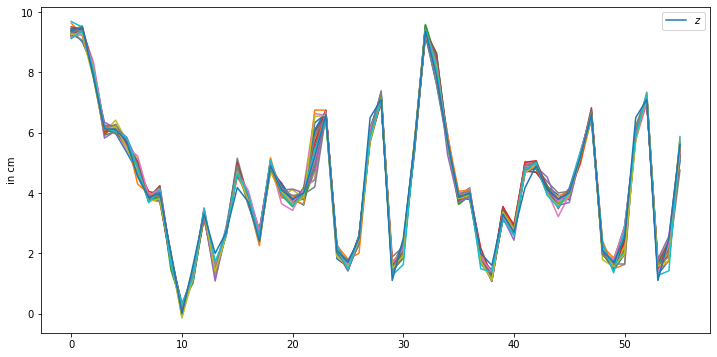

In [18]:
plt.figure(figsize=(12,6))
#plt.xlim(0,25)
#plt.ylim(-20,50)
#for i in range(0,rep):
    #plt.plot(v_pre_z[:][i])
plt.plot(v_pre_theta)
plt.plot(theta_teste,label=r"$z$")
plt.ylabel("in cm")
plt.legend(loc="best")
#plt.axhline(y=0)
plt.savefig('theta_fit_rep.png')

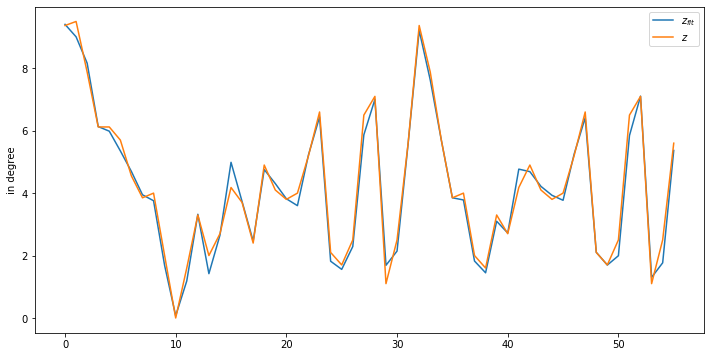

In [24]:
plt.figure(figsize=(12,6))
#plt.xlim(0,25)
#plt.ylim(-20,50)
#for i in range(0,rep):
    #plt.plot(v_pre_z[:][i])
plt.plot(v_pre_theta[:,0],label=r"$z_{fit}$")
plt.plot(theta_teste,label=r"$z$")
plt.ylabel("in degree")
plt.legend(loc="best")
#plt.axhline(y=0)
#plt.savefig('z_fit_teste.png')

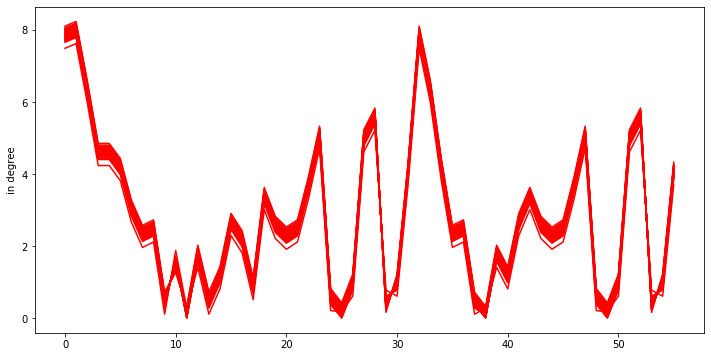

In [23]:
plt.figure(figsize=(12,6))
for i in range(0,rep):
    diff = np.abs(np.abs(v_pre_theta[:][i])- np.abs(theta_teste))

plt.plot(diff , c = 'r')

#plt.xlim(0,25)
#plt.ylim(-20,50)
#plt.plot(np.abs(val_prev_z-z_teste),label=r"$z_{fit}$")
plt.ylabel("in degree")
#plt.legend(loc="best")
#plt.axhline(y=0)
plt.savefig('difftheta.png')

## Fit $\phi$

In [42]:
colunas = ['x','y','z','theta','phi']
data = pd.read_csv('data-optical-design (1).csv', usecols= colunas)
data.head()

,x,y,z,theta,phi
0,-960,-388,71.0,9.37,26.3
1,-960,0,75.0,9.50,0.0
2,-840,-194,61.5,7.88,5.5
3,-600,-194,-18.5,6.12,16.3
4,-600,194,-18.5,6.12,-16.3


In [43]:
scaler5 = StandardScaler()
scaler6 = StandardScaler()
data[['x','y','theta']] = scaler5.fit_transform(data[['x','y','theta']])
data[['phi']] = scaler6.fit_transform(data[['phi']])
X_phi = data[['x','y','theta']]
y_phi = data['phi']
data.head()

,x,y,z,theta,phi
0,-2.015486,-1.126390,71.0,2.305600,0.245655
1,-2.015486,0.000000,75.0,2.364335,-0.079471
2,-1.720717,-0.563195,61.5,1.632404,-0.011479
3,-1.131178,-0.563195,-18.5,0.837219,0.122033
4,-1.131178,0.563195,-18.5,0.837219,-0.280976


In [44]:
col_phi = ['x','y','theta']

In [45]:
colunas_phi = [tf.feature_column.numeric_column(key = c) for c in col_phi]
colunas_phi

[NumericColumn(key='x', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='y', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='theta', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]

In [46]:
from sklearn.model_selection import train_test_split
X_train_phi,X_test_phi,y_train_phi,y_test_phi = train_test_split(X_phi,y_phi,test_size = 0.1588989523435)

In [47]:
rep = 30
v_pre_phi = np.ones([X_phi.shape[0],rep])
for j in tqdm(range(rep)):
    fn_phi = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_train_phi, y = y_train_phi, batch_size= 8,
                                                   num_epochs= None, shuffle= True)
    reg_phi = tf.estimator.DNNRegressor(hidden_units=[10], feature_columns=colunas_phi,
                                  activation_fn=tf.nn.relu, optimizer='Adam')
    reg_phi.train(input_fn = fn_phi, steps = 20000)
    fn_prev_phi = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_phi, shuffle = False)
    #prev_z = reg_z.predict(input_fn=fn_prev_z)
    val_prev_phi= []
    for p in reg_phi.predict(input_fn=fn_prev_phi):
        val_prev_phi.append(p['predictions'][0])
    aux = np.asarray(val_prev_phi).reshape(-1,1)
    for i in tqdm(range(0,X_phi.shape[0])):
        aux = np.asarray(val_prev_phi).reshape(-1,1)
        v_pre_phi[i][j] = aux[i][:]

  0%|          | 0/30 [00:00<?, ?it/s]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpjf3o938g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 292.876
INFO:tensorflow:loss = 0.6577322, step = 6300 (0.345 sec)
INFO:tensorflow:global_step/sec: 290.2
INFO:tensorflow:loss = 0.012702702, step = 6400 (0.343 sec)
INFO:tensorflow:global_step/sec: 208.451
INFO:tensorflow:loss = 0.44025415, step = 6500 (0.481 sec)
INFO:tensorflow:global_step/sec: 171.839
INFO:tensorflow:loss = 0.10304756, step = 6600 (0.579 sec)
INFO:tensorflow:global_step/sec: 177.206
INFO:tensorflow:loss = 0.4675798, step = 6700 (0.565 sec)
INFO:tensorflow:global_step/sec: 249.363
INFO:tensorflow:loss = 0.87644315, step = 6800 (0.400 sec)
INFO:tensorflow:global_step/sec: 429.944
INFO:tensorflow:loss = 0.030286219, step = 6900 (0.232 sec)
INFO:tensorflow:global_step/sec: 395.014
INFO:tensorflow:loss = 0.06569402, step = 7000 (0.257 sec)
INFO:tensorflow:global_step/sec: 311.049
INFO:tensorflow:loss = 0.30218643, step = 7100 (0.319 sec)
INFO:tensorflow:global_step/sec: 396.101
INFO:tensorflow:loss = 0.77403206, step = 7200 (0.252 sec)
IN

INFO:tensorflow:global_step/sec: 627.817
INFO:tensorflow:loss = 0.10357369, step = 14500 (0.160 sec)
INFO:tensorflow:global_step/sec: 611.334
INFO:tensorflow:loss = 0.023216287, step = 14600 (0.163 sec)
INFO:tensorflow:global_step/sec: 590.404
INFO:tensorflow:loss = 0.19925864, step = 14700 (0.168 sec)
INFO:tensorflow:global_step/sec: 562.434
INFO:tensorflow:loss = 0.06839261, step = 14800 (0.178 sec)
INFO:tensorflow:global_step/sec: 657.567
INFO:tensorflow:loss = 0.20435262, step = 14900 (0.152 sec)
INFO:tensorflow:global_step/sec: 583.405
INFO:tensorflow:loss = 0.17734262, step = 15000 (0.171 sec)
INFO:tensorflow:global_step/sec: 661.201
INFO:tensorflow:loss = 0.22775635, step = 15100 (0.152 sec)
INFO:tensorflow:global_step/sec: 563.971
INFO:tensorflow:loss = 0.34233683, step = 15200 (0.177 sec)
INFO:tensorflow:global_step/sec: 540.735
INFO:tensorflow:loss = 0.055218365, step = 15300 (0.185 sec)
INFO:tensorflow:global_step/sec: 552.042
INFO:tensorflow:loss = 0.02291125, step = 15400 


  3%|▎         | 1/30 [00:49<24:02, 49.75s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpad8qx_8a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 621.139
INFO:tensorflow:loss = 0.049639173, step = 6300 (0.161 sec)
INFO:tensorflow:global_step/sec: 558.236
INFO:tensorflow:loss = 0.017344277, step = 6400 (0.179 sec)
INFO:tensorflow:global_step/sec: 545.433
INFO:tensorflow:loss = 0.28272325, step = 6500 (0.183 sec)
INFO:tensorflow:global_step/sec: 544.335
INFO:tensorflow:loss = 0.10797283, step = 6600 (0.186 sec)
INFO:tensorflow:global_step/sec: 581.627
INFO:tensorflow:loss = 0.17115986, step = 6700 (0.170 sec)
INFO:tensorflow:global_step/sec: 576.057
INFO:tensorflow:loss = 0.102199174, step = 6800 (0.174 sec)
INFO:tensorflow:global_step/sec: 575.521
INFO:tensorflow:loss = 0.71928954, step = 6900 (0.176 sec)
INFO:tensorflow:global_step/sec: 602.285
INFO:tensorflow:loss = 0.07533602, step = 7000 (0.167 sec)
INFO:tensorflow:global_step/sec: 515.58
INFO:tensorflow:loss = 0.40171665, step = 7100 (0.191 sec)
INFO:tensorflow:global_step/sec: 579.373
INFO:tensorflow:loss = 0.02826521, step = 7200 (0.173 sec

INFO:tensorflow:global_step/sec: 492.151
INFO:tensorflow:loss = 0.12325661, step = 14500 (0.203 sec)
INFO:tensorflow:global_step/sec: 574.523
INFO:tensorflow:loss = 0.064639054, step = 14600 (0.174 sec)
INFO:tensorflow:global_step/sec: 604.374
INFO:tensorflow:loss = 0.03364457, step = 14700 (0.166 sec)
INFO:tensorflow:global_step/sec: 613.72
INFO:tensorflow:loss = 0.18173376, step = 14800 (0.164 sec)
INFO:tensorflow:global_step/sec: 643.076
INFO:tensorflow:loss = 0.024223253, step = 14900 (0.153 sec)
INFO:tensorflow:global_step/sec: 611.607
INFO:tensorflow:loss = 0.23124833, step = 15000 (0.165 sec)
INFO:tensorflow:global_step/sec: 576.3
INFO:tensorflow:loss = 0.059107386, step = 15100 (0.172 sec)
INFO:tensorflow:global_step/sec: 581.025
INFO:tensorflow:loss = 0.21247008, step = 15200 (0.176 sec)
INFO:tensorflow:global_step/sec: 592.898
INFO:tensorflow:loss = 0.1441167, step = 15300 (0.165 sec)
INFO:tensorflow:global_step/sec: 574.63
INFO:tensorflow:loss = 0.014889162, step = 15400 (0.


  7%|▋         | 2/30 [01:24<21:07, 45.27s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmppwf64jyn', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:loss = 0.3914639, step = 6300 (0.158 sec)
INFO:tensorflow:global_step/sec: 561.806
INFO:tensorflow:loss = 0.16510229, step = 6400 (0.178 sec)
INFO:tensorflow:global_step/sec: 615.123
INFO:tensorflow:loss = 0.7975851, step = 6500 (0.164 sec)
INFO:tensorflow:global_step/sec: 617.92
INFO:tensorflow:loss = 0.023218174, step = 6600 (0.161 sec)
INFO:tensorflow:global_step/sec: 522.202
INFO:tensorflow:loss = 0.27538487, step = 6700 (0.192 sec)
INFO:tensorflow:global_step/sec: 557.903
INFO:tensorflow:loss = 0.04466782, step = 6800 (0.178 sec)
INFO:tensorflow:global_step/sec: 566.362
INFO:tensorflow:loss = 0.8582083, step = 6900 (0.177 sec)
INFO:tensorflow:global_step/sec: 647.82
INFO:tensorflow:loss = 0.33987212, step = 7000 (0.155 sec)
INFO:tensorflow:global_step/sec: 641.869
INFO:tensorflow:loss = 0.5449499, step = 7100 (0.156 sec)
INFO:tensorflow:global_step/sec: 660.831
INFO:tensorflow:loss = 0.01288455, step = 7200 (0.150 sec)
INFO:tensorflow:global_step/sec: 613.151
INFO:

INFO:tensorflow:global_step/sec: 532.413
INFO:tensorflow:loss = 0.36307257, step = 14500 (0.182 sec)
INFO:tensorflow:global_step/sec: 646.42
INFO:tensorflow:loss = 0.12213247, step = 14600 (0.155 sec)
INFO:tensorflow:global_step/sec: 618.842
INFO:tensorflow:loss = 0.0068138232, step = 14700 (0.162 sec)
INFO:tensorflow:global_step/sec: 668.418
INFO:tensorflow:loss = 0.0844769, step = 14800 (0.151 sec)
INFO:tensorflow:global_step/sec: 566.904
INFO:tensorflow:loss = 0.27791965, step = 14900 (0.175 sec)
INFO:tensorflow:global_step/sec: 612.775
INFO:tensorflow:loss = 0.7043671, step = 15000 (0.164 sec)
INFO:tensorflow:global_step/sec: 641.061
INFO:tensorflow:loss = 0.14878069, step = 15100 (0.155 sec)
INFO:tensorflow:global_step/sec: 636.198
INFO:tensorflow:loss = 0.021631151, step = 15200 (0.158 sec)
INFO:tensorflow:global_step/sec: 574.607
INFO:tensorflow:loss = 0.22746955, step = 15300 (0.173 sec)
INFO:tensorflow:global_step/sec: 547.13
INFO:tensorflow:loss = 0.069559716, step = 15400 (0


 10%|█         | 3/30 [01:58<18:51, 41.89s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpjalefdii', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 519.433
INFO:tensorflow:loss = 0.016261948, step = 6300 (0.191 sec)
INFO:tensorflow:global_step/sec: 545.532
INFO:tensorflow:loss = 0.31775331, step = 6400 (0.185 sec)
INFO:tensorflow:global_step/sec: 607.066
INFO:tensorflow:loss = 0.6145446, step = 6500 (0.165 sec)
INFO:tensorflow:global_step/sec: 610.253
INFO:tensorflow:loss = 0.8229296, step = 6600 (0.162 sec)
INFO:tensorflow:global_step/sec: 667.264
INFO:tensorflow:loss = 0.47594818, step = 6700 (0.151 sec)
INFO:tensorflow:global_step/sec: 646.321
INFO:tensorflow:loss = 0.066005096, step = 6800 (0.153 sec)
INFO:tensorflow:global_step/sec: 612.141
INFO:tensorflow:loss = 0.41715282, step = 6900 (0.164 sec)
INFO:tensorflow:global_step/sec: 550.225
INFO:tensorflow:loss = 0.5525374, step = 7000 (0.182 sec)
INFO:tensorflow:global_step/sec: 572.901
INFO:tensorflow:loss = 0.41165924, step = 7100 (0.175 sec)
INFO:tensorflow:global_step/sec: 557.148
INFO:tensorflow:loss = 0.035991378, step = 7200 (0.178 sec)


INFO:tensorflow:global_step/sec: 263.987
INFO:tensorflow:loss = 0.17698036, step = 14500 (0.375 sec)
INFO:tensorflow:global_step/sec: 275.417
INFO:tensorflow:loss = 0.0075552645, step = 14600 (0.360 sec)
INFO:tensorflow:global_step/sec: 280.966
INFO:tensorflow:loss = 0.079199225, step = 14700 (0.358 sec)
INFO:tensorflow:global_step/sec: 261.022
INFO:tensorflow:loss = 0.4849909, step = 14800 (0.409 sec)
INFO:tensorflow:global_step/sec: 243.982
INFO:tensorflow:loss = 0.6743078, step = 14900 (0.384 sec)
INFO:tensorflow:global_step/sec: 282.904
INFO:tensorflow:loss = 0.3526219, step = 15000 (0.353 sec)
INFO:tensorflow:global_step/sec: 289.932
INFO:tensorflow:loss = 0.012132599, step = 15100 (0.349 sec)
INFO:tensorflow:global_step/sec: 261.58
INFO:tensorflow:loss = 0.20361921, step = 15200 (0.382 sec)
INFO:tensorflow:global_step/sec: 399.286
INFO:tensorflow:loss = 0.580183, step = 15300 (0.246 sec)
INFO:tensorflow:global_step/sec: 606.256
INFO:tensorflow:loss = 0.27932963, step = 15400 (0.1


 13%|█▎        | 4/30 [02:42<18:21, 42.38s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp3nx0ntyg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 394.605
INFO:tensorflow:loss = 0.4138727, step = 6300 (0.251 sec)
INFO:tensorflow:global_step/sec: 510.852
INFO:tensorflow:loss = 0.38213447, step = 6400 (0.195 sec)
INFO:tensorflow:global_step/sec: 642.48
INFO:tensorflow:loss = 0.014252085, step = 6500 (0.156 sec)
INFO:tensorflow:global_step/sec: 469.525
INFO:tensorflow:loss = 0.0125025725, step = 6600 (0.221 sec)
INFO:tensorflow:global_step/sec: 324.581
INFO:tensorflow:loss = 0.12738952, step = 6700 (0.300 sec)
INFO:tensorflow:global_step/sec: 566.25
INFO:tensorflow:loss = 0.43840274, step = 6800 (0.177 sec)
INFO:tensorflow:global_step/sec: 443.586
INFO:tensorflow:loss = 0.036670323, step = 6900 (0.227 sec)
INFO:tensorflow:global_step/sec: 307.552
INFO:tensorflow:loss = 0.30931005, step = 7000 (0.324 sec)
INFO:tensorflow:global_step/sec: 382.863
INFO:tensorflow:loss = 0.07467257, step = 7100 (0.261 sec)
INFO:tensorflow:global_step/sec: 545.642
INFO:tensorflow:loss = 0.056164034, step = 7200 (0.183 sec

INFO:tensorflow:global_step/sec: 607.162
INFO:tensorflow:loss = 0.5226035, step = 14500 (0.165 sec)
INFO:tensorflow:global_step/sec: 648.067
INFO:tensorflow:loss = 0.096309096, step = 14600 (0.152 sec)
INFO:tensorflow:global_step/sec: 438.35
INFO:tensorflow:loss = 0.22407636, step = 14700 (0.235 sec)
INFO:tensorflow:global_step/sec: 489.317
INFO:tensorflow:loss = 0.43223995, step = 14800 (0.197 sec)
INFO:tensorflow:global_step/sec: 596.528
INFO:tensorflow:loss = 0.3750342, step = 14900 (0.168 sec)
INFO:tensorflow:global_step/sec: 647.887
INFO:tensorflow:loss = 0.028347198, step = 15000 (0.154 sec)
INFO:tensorflow:global_step/sec: 528.406
INFO:tensorflow:loss = 0.074644536, step = 15100 (0.189 sec)
INFO:tensorflow:global_step/sec: 551.351
INFO:tensorflow:loss = 0.11513056, step = 15200 (0.181 sec)
INFO:tensorflow:global_step/sec: 650.657
INFO:tensorflow:loss = 0.25475445, step = 15300 (0.154 sec)
INFO:tensorflow:global_step/sec: 461.012
INFO:tensorflow:loss = 0.013176577, step = 15400 (


 17%|█▋        | 5/30 [03:21<17:17, 41.51s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp96jyc89m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 463.251
INFO:tensorflow:loss = 0.24575272, step = 6300 (0.219 sec)
INFO:tensorflow:global_step/sec: 459.385
INFO:tensorflow:loss = 0.24961314, step = 6400 (0.215 sec)
INFO:tensorflow:global_step/sec: 431.513
INFO:tensorflow:loss = 0.35363233, step = 6500 (0.232 sec)
INFO:tensorflow:global_step/sec: 442.331
INFO:tensorflow:loss = 0.3177792, step = 6600 (0.226 sec)
INFO:tensorflow:global_step/sec: 487.227
INFO:tensorflow:loss = 0.2390809, step = 6700 (0.205 sec)
INFO:tensorflow:global_step/sec: 413.028
INFO:tensorflow:loss = 0.0101549225, step = 6800 (0.243 sec)
INFO:tensorflow:global_step/sec: 482.893
INFO:tensorflow:loss = 0.009601718, step = 6900 (0.209 sec)
INFO:tensorflow:global_step/sec: 451.001
INFO:tensorflow:loss = 0.22671899, step = 7000 (0.220 sec)
INFO:tensorflow:global_step/sec: 414.141
INFO:tensorflow:loss = 0.15900864, step = 7100 (0.241 sec)
INFO:tensorflow:global_step/sec: 422.579
INFO:tensorflow:loss = 0.18262261, step = 7200 (0.237 sec)

INFO:tensorflow:global_step/sec: 460.9
INFO:tensorflow:loss = 0.11986774, step = 14500 (0.217 sec)
INFO:tensorflow:global_step/sec: 477.709
INFO:tensorflow:loss = 0.22931552, step = 14600 (0.210 sec)
INFO:tensorflow:global_step/sec: 442.314
INFO:tensorflow:loss = 0.034069445, step = 14700 (0.226 sec)
INFO:tensorflow:global_step/sec: 424.561
INFO:tensorflow:loss = 0.01169374, step = 14800 (0.234 sec)
INFO:tensorflow:global_step/sec: 465.963
INFO:tensorflow:loss = 0.062495697, step = 14900 (0.216 sec)
INFO:tensorflow:global_step/sec: 462.105
INFO:tensorflow:loss = 0.1389601, step = 15000 (0.216 sec)
INFO:tensorflow:global_step/sec: 467.415
INFO:tensorflow:loss = 0.05395376, step = 15100 (0.216 sec)
INFO:tensorflow:global_step/sec: 428.382
INFO:tensorflow:loss = 0.26394114, step = 15200 (0.245 sec)
INFO:tensorflow:global_step/sec: 391.806
INFO:tensorflow:loss = 0.12107609, step = 15300 (0.243 sec)
INFO:tensorflow:global_step/sec: 443.793
INFO:tensorflow:loss = 0.16781022, step = 15400 (0.


 20%|██        | 6/30 [04:07<17:04, 42.70s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpz4bhhpit', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 300.191
INFO:tensorflow:loss = 0.4889309, step = 6300 (0.335 sec)
INFO:tensorflow:global_step/sec: 247.5
INFO:tensorflow:loss = 0.28641394, step = 6400 (0.403 sec)
INFO:tensorflow:global_step/sec: 340.117
INFO:tensorflow:loss = 0.40072545, step = 6500 (0.295 sec)
INFO:tensorflow:global_step/sec: 209.752
INFO:tensorflow:loss = 0.2690872, step = 6600 (0.484 sec)
INFO:tensorflow:global_step/sec: 219.086
INFO:tensorflow:loss = 0.27043855, step = 6700 (0.448 sec)
INFO:tensorflow:global_step/sec: 316.018
INFO:tensorflow:loss = 0.008780955, step = 6800 (0.319 sec)
INFO:tensorflow:global_step/sec: 428.869
INFO:tensorflow:loss = 0.19486602, step = 6900 (0.230 sec)
INFO:tensorflow:global_step/sec: 385.094
INFO:tensorflow:loss = 0.80580056, step = 7000 (0.260 sec)
INFO:tensorflow:global_step/sec: 392.492
INFO:tensorflow:loss = 0.10540502, step = 7100 (0.255 sec)
INFO:tensorflow:global_step/sec: 349.024
INFO:tensorflow:loss = 0.05999073, step = 7200 (0.288 sec)
INF

INFO:tensorflow:global_step/sec: 488.621
INFO:tensorflow:loss = 0.31074363, step = 14500 (0.205 sec)
INFO:tensorflow:global_step/sec: 414.379
INFO:tensorflow:loss = 0.19621208, step = 14600 (0.249 sec)
INFO:tensorflow:global_step/sec: 394.429
INFO:tensorflow:loss = 0.19421871, step = 14700 (0.247 sec)
INFO:tensorflow:global_step/sec: 433.652
INFO:tensorflow:loss = 0.28238925, step = 14800 (0.229 sec)
INFO:tensorflow:global_step/sec: 409.305
INFO:tensorflow:loss = 0.19124712, step = 14900 (0.245 sec)
INFO:tensorflow:global_step/sec: 448.851
INFO:tensorflow:loss = 0.12766054, step = 15000 (0.222 sec)
INFO:tensorflow:global_step/sec: 436.571
INFO:tensorflow:loss = 0.13340765, step = 15100 (0.229 sec)
INFO:tensorflow:global_step/sec: 463.644
INFO:tensorflow:loss = 0.32540673, step = 15200 (0.216 sec)
INFO:tensorflow:global_step/sec: 442.19
INFO:tensorflow:loss = 0.40797162, step = 15300 (0.226 sec)
INFO:tensorflow:global_step/sec: 459.614
INFO:tensorflow:loss = 0.009688264, step = 15400 (0


 23%|██▎       | 7/30 [05:03<17:56, 46.82s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpp3_e3lff', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 429.301
INFO:tensorflow:loss = 0.09605184, step = 6300 (0.240 sec)
INFO:tensorflow:global_step/sec: 419.944
INFO:tensorflow:loss = 0.042702954, step = 6400 (0.230 sec)
INFO:tensorflow:global_step/sec: 457.892
INFO:tensorflow:loss = 0.343987, step = 6500 (0.222 sec)
INFO:tensorflow:global_step/sec: 467.444
INFO:tensorflow:loss = 0.18138367, step = 6600 (0.210 sec)
INFO:tensorflow:global_step/sec: 466.416
INFO:tensorflow:loss = 0.006721322, step = 6700 (0.216 sec)
INFO:tensorflow:global_step/sec: 459.642
INFO:tensorflow:loss = 0.12775718, step = 6800 (0.216 sec)
INFO:tensorflow:global_step/sec: 469.58
INFO:tensorflow:loss = 0.004262458, step = 6900 (0.213 sec)
INFO:tensorflow:global_step/sec: 406.426
INFO:tensorflow:loss = 0.082845494, step = 7000 (0.251 sec)
INFO:tensorflow:global_step/sec: 450.728
INFO:tensorflow:loss = 0.8110478, step = 7100 (0.217 sec)
INFO:tensorflow:global_step/sec: 466.32
INFO:tensorflow:loss = 0.07051335, step = 7200 (0.216 sec)
I

INFO:tensorflow:global_step/sec: 246.696
INFO:tensorflow:loss = 0.25200933, step = 14500 (0.398 sec)
INFO:tensorflow:global_step/sec: 248.704
INFO:tensorflow:loss = 0.08378652, step = 14600 (0.397 sec)
INFO:tensorflow:global_step/sec: 326.337
INFO:tensorflow:loss = 0.029411312, step = 14700 (0.307 sec)
INFO:tensorflow:global_step/sec: 321.388
INFO:tensorflow:loss = 0.023588633, step = 14800 (0.315 sec)
INFO:tensorflow:global_step/sec: 273.216
INFO:tensorflow:loss = 0.10655276, step = 14900 (0.360 sec)
INFO:tensorflow:global_step/sec: 311.542
INFO:tensorflow:loss = 0.17490594, step = 15000 (0.329 sec)
INFO:tensorflow:global_step/sec: 455.866
INFO:tensorflow:loss = 0.16367567, step = 15100 (0.212 sec)
INFO:tensorflow:global_step/sec: 331.924
INFO:tensorflow:loss = 0.046240665, step = 15200 (0.302 sec)
INFO:tensorflow:global_step/sec: 452.732
INFO:tensorflow:loss = 0.013689916, step = 15300 (0.220 sec)
INFO:tensorflow:global_step/sec: 464.102
INFO:tensorflow:loss = 0.1343117, step = 15400


 27%|██▋       | 8/30 [05:56<17:49, 48.64s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpqf372nqm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 432.637
INFO:tensorflow:loss = 0.27041006, step = 6300 (0.233 sec)
INFO:tensorflow:global_step/sec: 457.658
INFO:tensorflow:loss = 0.015363472, step = 6400 (0.219 sec)
INFO:tensorflow:global_step/sec: 408.236
INFO:tensorflow:loss = 0.09551327, step = 6500 (0.244 sec)
INFO:tensorflow:global_step/sec: 372.817
INFO:tensorflow:loss = 0.08842463, step = 6600 (0.268 sec)
INFO:tensorflow:global_step/sec: 365.307
INFO:tensorflow:loss = 0.0073388433, step = 6700 (0.276 sec)
INFO:tensorflow:global_step/sec: 400.577
INFO:tensorflow:loss = 0.22406937, step = 6800 (0.250 sec)
INFO:tensorflow:global_step/sec: 468.395
INFO:tensorflow:loss = 0.63134813, step = 6900 (0.211 sec)
INFO:tensorflow:global_step/sec: 445.011
INFO:tensorflow:loss = 0.28534022, step = 7000 (0.224 sec)
INFO:tensorflow:global_step/sec: 427.417
INFO:tensorflow:loss = 0.26040667, step = 7100 (0.233 sec)
INFO:tensorflow:global_step/sec: 411.424
INFO:tensorflow:loss = 0.094084516, step = 7200 (0.243 s

INFO:tensorflow:global_step/sec: 309.478
INFO:tensorflow:loss = 0.029839782, step = 14500 (0.332 sec)
INFO:tensorflow:global_step/sec: 232.67
INFO:tensorflow:loss = 0.4035323, step = 14600 (0.422 sec)
INFO:tensorflow:global_step/sec: 423.198
INFO:tensorflow:loss = 0.081086725, step = 14700 (0.234 sec)
INFO:tensorflow:global_step/sec: 491.532
INFO:tensorflow:loss = 0.19820647, step = 14800 (0.203 sec)
INFO:tensorflow:global_step/sec: 378.507
INFO:tensorflow:loss = 0.1357643, step = 14900 (0.264 sec)
INFO:tensorflow:global_step/sec: 409.524
INFO:tensorflow:loss = 0.020269752, step = 15000 (0.244 sec)
INFO:tensorflow:global_step/sec: 250.066
INFO:tensorflow:loss = 0.16281092, step = 15100 (0.400 sec)
INFO:tensorflow:global_step/sec: 438.184
INFO:tensorflow:loss = 0.017881036, step = 15200 (0.228 sec)
INFO:tensorflow:global_step/sec: 460.763
INFO:tensorflow:loss = 0.02439662, step = 15300 (0.217 sec)
INFO:tensorflow:global_step/sec: 498.759
INFO:tensorflow:loss = 0.09980887, step = 15400 (


 30%|███       | 9/30 [06:49<17:30, 50.02s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvyn5vgte', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 592.19
INFO:tensorflow:loss = 0.41767722, step = 6300 (0.168 sec)
INFO:tensorflow:global_step/sec: 555.302
INFO:tensorflow:loss = 0.7659625, step = 6400 (0.181 sec)
INFO:tensorflow:global_step/sec: 581.259
INFO:tensorflow:loss = 0.013741806, step = 6500 (0.173 sec)
INFO:tensorflow:global_step/sec: 610.032
INFO:tensorflow:loss = 0.04587069, step = 6600 (0.163 sec)
INFO:tensorflow:global_step/sec: 553.975
INFO:tensorflow:loss = 0.041223794, step = 6700 (0.180 sec)
INFO:tensorflow:global_step/sec: 602.137
INFO:tensorflow:loss = 0.1750953, step = 6800 (0.166 sec)
INFO:tensorflow:global_step/sec: 667.089
INFO:tensorflow:loss = 0.21711862, step = 6900 (0.150 sec)
INFO:tensorflow:global_step/sec: 668.674
INFO:tensorflow:loss = 0.13583328, step = 7000 (0.150 sec)
INFO:tensorflow:global_step/sec: 663.285
INFO:tensorflow:loss = 0.6294975, step = 7100 (0.151 sec)
INFO:tensorflow:global_step/sec: 654.239
INFO:tensorflow:loss = 0.48906434, step = 7200 (0.153 sec)
IN

INFO:tensorflow:global_step/sec: 653.88
INFO:tensorflow:loss = 0.62378305, step = 14500 (0.152 sec)
INFO:tensorflow:global_step/sec: 669.331
INFO:tensorflow:loss = 0.009265384, step = 14600 (0.150 sec)
INFO:tensorflow:global_step/sec: 662.961
INFO:tensorflow:loss = 0.2528964, step = 14700 (0.151 sec)
INFO:tensorflow:global_step/sec: 644.915
INFO:tensorflow:loss = 0.120082155, step = 14800 (0.155 sec)
INFO:tensorflow:global_step/sec: 666.12
INFO:tensorflow:loss = 0.18500423, step = 14900 (0.151 sec)
INFO:tensorflow:global_step/sec: 651.414
INFO:tensorflow:loss = 0.2593016, step = 15000 (0.151 sec)
INFO:tensorflow:global_step/sec: 647.781
INFO:tensorflow:loss = 0.22318375, step = 15100 (0.154 sec)
INFO:tensorflow:global_step/sec: 629.06
INFO:tensorflow:loss = 0.2602653, step = 15200 (0.160 sec)
INFO:tensorflow:global_step/sec: 634.471
INFO:tensorflow:loss = 0.5488663, step = 15300 (0.157 sec)
INFO:tensorflow:global_step/sec: 641.557
INFO:tensorflow:loss = 0.19567515, step = 15400 (0.156 


 33%|███▎      | 10/30 [07:23<15:06, 45.32s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpr8twfjf4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 280.713
INFO:tensorflow:loss = 0.0060368273, step = 6300 (0.337 sec)
INFO:tensorflow:global_step/sec: 328.441
INFO:tensorflow:loss = 0.39232293, step = 6400 (0.305 sec)
INFO:tensorflow:global_step/sec: 299.326
INFO:tensorflow:loss = 0.2557119, step = 6500 (0.334 sec)
INFO:tensorflow:global_step/sec: 338.445
INFO:tensorflow:loss = 0.17371951, step = 6600 (0.295 sec)
INFO:tensorflow:global_step/sec: 270.902
INFO:tensorflow:loss = 0.072582364, step = 6700 (0.369 sec)
INFO:tensorflow:global_step/sec: 324.112
INFO:tensorflow:loss = 0.16734818, step = 6800 (0.313 sec)
INFO:tensorflow:global_step/sec: 400.09
INFO:tensorflow:loss = 0.27660125, step = 6900 (0.248 sec)
INFO:tensorflow:global_step/sec: 252.567
INFO:tensorflow:loss = 0.07335919, step = 7000 (0.400 sec)
INFO:tensorflow:global_step/sec: 414.462
INFO:tensorflow:loss = 0.01198577, step = 7100 (0.235 sec)
INFO:tensorflow:global_step/sec: 368.981
INFO:tensorflow:loss = 0.14468569, step = 7200 (0.272 sec)

INFO:tensorflow:loss = 0.044034272, step = 14400 (0.210 sec)
INFO:tensorflow:global_step/sec: 437.682
INFO:tensorflow:loss = 0.027140345, step = 14500 (0.231 sec)
INFO:tensorflow:global_step/sec: 499.716
INFO:tensorflow:loss = 0.036666624, step = 14600 (0.199 sec)
INFO:tensorflow:global_step/sec: 436.398
INFO:tensorflow:loss = 0.008434363, step = 14700 (0.227 sec)
INFO:tensorflow:global_step/sec: 402.25
INFO:tensorflow:loss = 0.015103988, step = 14800 (0.250 sec)
INFO:tensorflow:global_step/sec: 452.978
INFO:tensorflow:loss = 0.100883506, step = 14900 (0.220 sec)
INFO:tensorflow:global_step/sec: 429.856
INFO:tensorflow:loss = 0.013638417, step = 15000 (0.232 sec)
INFO:tensorflow:global_step/sec: 456.927
INFO:tensorflow:loss = 0.009416437, step = 15100 (0.220 sec)
INFO:tensorflow:global_step/sec: 466.599
INFO:tensorflow:loss = 0.23640001, step = 15200 (0.216 sec)
INFO:tensorflow:global_step/sec: 419.83
INFO:tensorflow:loss = 0.012271444, step = 15300 (0.236 sec)
INFO:tensorflow:global_s


 37%|███▋      | 11/30 [08:13<14:47, 46.73s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp663xt4_6', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 471.895
INFO:tensorflow:loss = 0.8471185, step = 6300 (0.213 sec)
INFO:tensorflow:global_step/sec: 392.533
INFO:tensorflow:loss = 0.103618115, step = 6400 (0.256 sec)
INFO:tensorflow:global_step/sec: 463.151
INFO:tensorflow:loss = 0.23679106, step = 6500 (0.216 sec)
INFO:tensorflow:global_step/sec: 434.581
INFO:tensorflow:loss = 0.06099537, step = 6600 (0.229 sec)
INFO:tensorflow:global_step/sec: 455.769
INFO:tensorflow:loss = 0.018828258, step = 6700 (0.219 sec)
INFO:tensorflow:global_step/sec: 466.748
INFO:tensorflow:loss = 0.35199857, step = 6800 (0.214 sec)
INFO:tensorflow:global_step/sec: 424.456
INFO:tensorflow:loss = 0.81176597, step = 6900 (0.236 sec)
INFO:tensorflow:global_step/sec: 453.189
INFO:tensorflow:loss = 0.66405106, step = 7000 (0.226 sec)
INFO:tensorflow:global_step/sec: 414.258
INFO:tensorflow:loss = 0.13192207, step = 7100 (0.236 sec)
INFO:tensorflow:global_step/sec: 430.5
INFO:tensorflow:loss = 0.014606369, step = 7200 (0.231 sec)


INFO:tensorflow:global_step/sec: 432.783
INFO:tensorflow:loss = 0.04571861, step = 14500 (0.227 sec)
INFO:tensorflow:global_step/sec: 393.518
INFO:tensorflow:loss = 0.3108038, step = 14600 (0.255 sec)
INFO:tensorflow:global_step/sec: 450.051
INFO:tensorflow:loss = 0.09643605, step = 14700 (0.222 sec)
INFO:tensorflow:global_step/sec: 474.844
INFO:tensorflow:loss = 0.50795156, step = 14800 (0.210 sec)
INFO:tensorflow:global_step/sec: 418.336
INFO:tensorflow:loss = 0.10160686, step = 14900 (0.238 sec)
INFO:tensorflow:global_step/sec: 461.45
INFO:tensorflow:loss = 0.014909595, step = 15000 (0.217 sec)
INFO:tensorflow:global_step/sec: 480.459
INFO:tensorflow:loss = 0.16197667, step = 15100 (0.211 sec)
INFO:tensorflow:global_step/sec: 386.531
INFO:tensorflow:loss = 0.5161078, step = 15200 (0.256 sec)
INFO:tensorflow:global_step/sec: 460.508
INFO:tensorflow:loss = 0.08178065, step = 15300 (0.217 sec)
INFO:tensorflow:global_step/sec: 435.894
INFO:tensorflow:loss = 0.021866513, step = 15400 (0.


 40%|████      | 12/30 [09:01<14:02, 46.82s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpkhoe38ef', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 665.146
INFO:tensorflow:loss = 0.3577949, step = 6300 (0.150 sec)
INFO:tensorflow:global_step/sec: 668.642
INFO:tensorflow:loss = 0.4004029, step = 6400 (0.150 sec)
INFO:tensorflow:global_step/sec: 674.656
INFO:tensorflow:loss = 0.107848935, step = 6500 (0.148 sec)
INFO:tensorflow:global_step/sec: 637.815
INFO:tensorflow:loss = 0.48088992, step = 6600 (0.157 sec)
INFO:tensorflow:global_step/sec: 668.912
INFO:tensorflow:loss = 0.6658989, step = 6700 (0.150 sec)
INFO:tensorflow:global_step/sec: 677.503
INFO:tensorflow:loss = 0.1462452, step = 6800 (0.148 sec)
INFO:tensorflow:global_step/sec: 678.072
INFO:tensorflow:loss = 0.12760319, step = 6900 (0.147 sec)
INFO:tensorflow:global_step/sec: 678.781
INFO:tensorflow:loss = 0.6886406, step = 7000 (0.147 sec)
INFO:tensorflow:global_step/sec: 667.669
INFO:tensorflow:loss = 0.54617673, step = 7100 (0.150 sec)
INFO:tensorflow:global_step/sec: 688.004
INFO:tensorflow:loss = 0.064153135, step = 7200 (0.145 sec)
INF

INFO:tensorflow:loss = 0.017696105, step = 14400 (0.147 sec)
INFO:tensorflow:global_step/sec: 681.749
INFO:tensorflow:loss = 0.34851995, step = 14500 (0.147 sec)
INFO:tensorflow:global_step/sec: 688.454
INFO:tensorflow:loss = 0.006776179, step = 14600 (0.145 sec)
INFO:tensorflow:global_step/sec: 684.326
INFO:tensorflow:loss = 0.37105146, step = 14700 (0.146 sec)
INFO:tensorflow:global_step/sec: 655.563
INFO:tensorflow:loss = 0.009766491, step = 14800 (0.152 sec)
INFO:tensorflow:global_step/sec: 694.174
INFO:tensorflow:loss = 0.21630178, step = 14900 (0.144 sec)
INFO:tensorflow:global_step/sec: 671.531
INFO:tensorflow:loss = 0.007148917, step = 15000 (0.149 sec)
INFO:tensorflow:global_step/sec: 692.075
INFO:tensorflow:loss = 0.124933116, step = 15100 (0.145 sec)
INFO:tensorflow:global_step/sec: 484.17
INFO:tensorflow:loss = 0.007872088, step = 15200 (0.207 sec)
INFO:tensorflow:global_step/sec: 428.43
INFO:tensorflow:loss = 0.052318443, step = 15300 (0.234 sec)
INFO:tensorflow:global_ste


 43%|████▎     | 13/30 [09:41<12:44, 45.00s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpih5zu01_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 309.239
INFO:tensorflow:loss = 0.29757872, step = 6300 (0.323 sec)
INFO:tensorflow:global_step/sec: 429.301
INFO:tensorflow:loss = 0.4984483, step = 6400 (0.235 sec)
INFO:tensorflow:global_step/sec: 373.089
INFO:tensorflow:loss = 0.2304838, step = 6500 (0.267 sec)
INFO:tensorflow:global_step/sec: 417.976
INFO:tensorflow:loss = 0.3544377, step = 6600 (0.239 sec)
INFO:tensorflow:global_step/sec: 481.906
INFO:tensorflow:loss = 0.4752851, step = 6700 (0.208 sec)
INFO:tensorflow:global_step/sec: 453.831
INFO:tensorflow:loss = 0.42458478, step = 6800 (0.220 sec)
INFO:tensorflow:global_step/sec: 423.806
INFO:tensorflow:loss = 0.029275682, step = 6900 (0.238 sec)
INFO:tensorflow:global_step/sec: 461.859
INFO:tensorflow:loss = 0.16347593, step = 7000 (0.216 sec)
INFO:tensorflow:global_step/sec: 425.973
INFO:tensorflow:loss = 0.024239209, step = 7100 (0.234 sec)
INFO:tensorflow:global_step/sec: 414.384
INFO:tensorflow:loss = 0.33255497, step = 7200 (0.243 sec)
IN

INFO:tensorflow:loss = 0.13572687, step = 14400 (0.208 sec)
INFO:tensorflow:global_step/sec: 421.89
INFO:tensorflow:loss = 0.04053845, step = 14500 (0.236 sec)
INFO:tensorflow:global_step/sec: 420.148
INFO:tensorflow:loss = 0.034910806, step = 14600 (0.237 sec)
INFO:tensorflow:global_step/sec: 414.152
INFO:tensorflow:loss = 0.117210194, step = 14700 (0.242 sec)
INFO:tensorflow:global_step/sec: 433.576
INFO:tensorflow:loss = 0.14381492, step = 14800 (0.230 sec)
INFO:tensorflow:global_step/sec: 465.576
INFO:tensorflow:loss = 0.04591307, step = 14900 (0.215 sec)
INFO:tensorflow:global_step/sec: 422.849
INFO:tensorflow:loss = 0.015501205, step = 15000 (0.236 sec)
INFO:tensorflow:global_step/sec: 445.428
INFO:tensorflow:loss = 0.10504938, step = 15100 (0.225 sec)
INFO:tensorflow:global_step/sec: 467.414
INFO:tensorflow:loss = 0.07485689, step = 15200 (0.214 sec)
INFO:tensorflow:global_step/sec: 414.086
INFO:tensorflow:loss = 0.22260635, step = 15300 (0.242 sec)
INFO:tensorflow:global_step/s


 47%|████▋     | 14/30 [10:29<12:11, 45.72s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpnpfc70hv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 285.418
INFO:tensorflow:loss = 0.42955464, step = 6300 (0.339 sec)
INFO:tensorflow:global_step/sec: 402.272
INFO:tensorflow:loss = 0.52833545, step = 6400 (0.250 sec)
INFO:tensorflow:global_step/sec: 438.132
INFO:tensorflow:loss = 0.21055552, step = 6500 (0.228 sec)
INFO:tensorflow:global_step/sec: 484.406
INFO:tensorflow:loss = 1.0025014, step = 6600 (0.208 sec)
INFO:tensorflow:global_step/sec: 378.481
INFO:tensorflow:loss = 0.5884286, step = 6700 (0.262 sec)
INFO:tensorflow:global_step/sec: 494.064
INFO:tensorflow:loss = 0.010563206, step = 6800 (0.202 sec)
INFO:tensorflow:global_step/sec: 483.825
INFO:tensorflow:loss = 0.29915386, step = 6900 (0.208 sec)
INFO:tensorflow:global_step/sec: 440.594
INFO:tensorflow:loss = 0.021989154, step = 7000 (0.233 sec)
INFO:tensorflow:global_step/sec: 486.514
INFO:tensorflow:loss = 0.0126247015, step = 7100 (0.201 sec)
INFO:tensorflow:global_step/sec: 454.195
INFO:tensorflow:loss = 0.30686465, step = 7200 (0.219 sec

INFO:tensorflow:global_step/sec: 466.837
INFO:tensorflow:loss = 0.12176233, step = 14500 (0.213 sec)
INFO:tensorflow:global_step/sec: 467.519
INFO:tensorflow:loss = 0.5484845, step = 14600 (0.214 sec)
INFO:tensorflow:global_step/sec: 376.56
INFO:tensorflow:loss = 0.14695084, step = 14700 (0.270 sec)
INFO:tensorflow:global_step/sec: 393.083
INFO:tensorflow:loss = 0.6789299, step = 14800 (0.251 sec)
INFO:tensorflow:global_step/sec: 447.125
INFO:tensorflow:loss = 0.11254512, step = 14900 (0.228 sec)
INFO:tensorflow:global_step/sec: 427.696
INFO:tensorflow:loss = 0.16378367, step = 15000 (0.230 sec)
INFO:tensorflow:global_step/sec: 449.241
INFO:tensorflow:loss = 0.028667703, step = 15100 (0.222 sec)
INFO:tensorflow:global_step/sec: 483.098
INFO:tensorflow:loss = 0.028010016, step = 15200 (0.209 sec)
INFO:tensorflow:global_step/sec: 433.741
INFO:tensorflow:loss = 0.12054676, step = 15300 (0.229 sec)
INFO:tensorflow:global_step/sec: 466.134
INFO:tensorflow:loss = 0.024925053, step = 15400 (0


 50%|█████     | 15/30 [11:15<11:29, 45.99s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp252chp6n', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 625.244
INFO:tensorflow:loss = 0.020737939, step = 6300 (0.158 sec)
INFO:tensorflow:global_step/sec: 641.471
INFO:tensorflow:loss = 0.0036548362, step = 6400 (0.156 sec)
INFO:tensorflow:global_step/sec: 615.056
INFO:tensorflow:loss = 0.3732724, step = 6500 (0.163 sec)
INFO:tensorflow:global_step/sec: 598.402
INFO:tensorflow:loss = 0.18081857, step = 6600 (0.167 sec)
INFO:tensorflow:global_step/sec: 574.291
INFO:tensorflow:loss = 0.3806027, step = 6700 (0.174 sec)
INFO:tensorflow:global_step/sec: 610.418
INFO:tensorflow:loss = 0.33557522, step = 6800 (0.167 sec)
INFO:tensorflow:global_step/sec: 634.109
INFO:tensorflow:loss = 0.012321815, step = 6900 (0.157 sec)
INFO:tensorflow:global_step/sec: 640.358
INFO:tensorflow:loss = 0.22409062, step = 7000 (0.155 sec)
INFO:tensorflow:global_step/sec: 611.567
INFO:tensorflow:loss = 0.006388479, step = 7100 (0.163 sec)
INFO:tensorflow:global_step/sec: 602.389
INFO:tensorflow:loss = 0.13753755, step = 7200 (0.166 se

INFO:tensorflow:loss = 0.082614414, step = 14400 (0.151 sec)
INFO:tensorflow:global_step/sec: 622.125
INFO:tensorflow:loss = 0.16718228, step = 14500 (0.161 sec)
INFO:tensorflow:global_step/sec: 604.57
INFO:tensorflow:loss = 0.012854821, step = 14600 (0.166 sec)
INFO:tensorflow:global_step/sec: 612.063
INFO:tensorflow:loss = 0.0081353355, step = 14700 (0.161 sec)
INFO:tensorflow:global_step/sec: 644.699
INFO:tensorflow:loss = 0.15043193, step = 14800 (0.156 sec)
INFO:tensorflow:global_step/sec: 575.904
INFO:tensorflow:loss = 0.036645647, step = 14900 (0.173 sec)
INFO:tensorflow:global_step/sec: 587.486
INFO:tensorflow:loss = 0.07055992, step = 15000 (0.171 sec)
INFO:tensorflow:global_step/sec: 661.716
INFO:tensorflow:loss = 0.016842429, step = 15100 (0.152 sec)
INFO:tensorflow:global_step/sec: 627.102
INFO:tensorflow:loss = 0.41216755, step = 15200 (0.158 sec)
INFO:tensorflow:global_step/sec: 587.982
INFO:tensorflow:loss = 0.036214758, step = 15300 (0.170 sec)
INFO:tensorflow:global_st


 53%|█████▎    | 16/30 [11:53<10:09, 43.51s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpsz5v_uf4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 605.138
INFO:tensorflow:loss = 0.45638797, step = 6300 (0.170 sec)
INFO:tensorflow:global_step/sec: 555.997
INFO:tensorflow:loss = 0.080148086, step = 6400 (0.175 sec)
INFO:tensorflow:global_step/sec: 638.482
INFO:tensorflow:loss = 0.008612409, step = 6500 (0.157 sec)
INFO:tensorflow:global_step/sec: 637.946
INFO:tensorflow:loss = 0.20145667, step = 6600 (0.158 sec)
INFO:tensorflow:global_step/sec: 585.305
INFO:tensorflow:loss = 0.34407443, step = 6700 (0.170 sec)
INFO:tensorflow:global_step/sec: 626.993
INFO:tensorflow:loss = 0.011381561, step = 6800 (0.159 sec)
INFO:tensorflow:global_step/sec: 614.887
INFO:tensorflow:loss = 0.2696666, step = 6900 (0.165 sec)
INFO:tensorflow:global_step/sec: 553.14
INFO:tensorflow:loss = 0.012871933, step = 7000 (0.180 sec)
INFO:tensorflow:global_step/sec: 386.927
INFO:tensorflow:loss = 0.41265115, step = 7100 (0.257 sec)
INFO:tensorflow:global_step/sec: 611.958
INFO:tensorflow:loss = 0.010750732, step = 7200 (0.165 se

INFO:tensorflow:loss = 0.008067468, step = 14400 (0.184 sec)
INFO:tensorflow:global_step/sec: 521.545
INFO:tensorflow:loss = 0.004130751, step = 14500 (0.190 sec)
INFO:tensorflow:global_step/sec: 552.561
INFO:tensorflow:loss = 0.012745187, step = 14600 (0.180 sec)
INFO:tensorflow:global_step/sec: 584.32
INFO:tensorflow:loss = 0.06844671, step = 14700 (0.175 sec)
INFO:tensorflow:global_step/sec: 573.035
INFO:tensorflow:loss = 0.038414046, step = 14800 (0.172 sec)
INFO:tensorflow:global_step/sec: 636.262
INFO:tensorflow:loss = 0.016000072, step = 14900 (0.156 sec)
INFO:tensorflow:global_step/sec: 598.752
INFO:tensorflow:loss = 0.15338355, step = 15000 (0.167 sec)
INFO:tensorflow:global_step/sec: 596.601
INFO:tensorflow:loss = 0.08736695, step = 15100 (0.167 sec)
INFO:tensorflow:global_step/sec: 638.982
INFO:tensorflow:loss = 0.0037584575, step = 15200 (0.157 sec)
INFO:tensorflow:global_step/sec: 559.183
INFO:tensorflow:loss = 0.07527186, step = 15300 (0.180 sec)
INFO:tensorflow:global_st


 57%|█████▋    | 17/30 [12:29<08:56, 41.25s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdu01nax2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 581.612
INFO:tensorflow:loss = 0.1358458, step = 6300 (0.172 sec)
INFO:tensorflow:global_step/sec: 570.018
INFO:tensorflow:loss = 0.6579664, step = 6400 (0.176 sec)
INFO:tensorflow:global_step/sec: 593.881
INFO:tensorflow:loss = 0.039031077, step = 6500 (0.168 sec)
INFO:tensorflow:global_step/sec: 633.895
INFO:tensorflow:loss = 0.12483864, step = 6600 (0.158 sec)
INFO:tensorflow:global_step/sec: 599.891
INFO:tensorflow:loss = 0.09950483, step = 6700 (0.167 sec)
INFO:tensorflow:global_step/sec: 599.51
INFO:tensorflow:loss = 0.59907556, step = 6800 (0.168 sec)
INFO:tensorflow:global_step/sec: 528.526
INFO:tensorflow:loss = 0.2127538, step = 6900 (0.190 sec)
INFO:tensorflow:global_step/sec: 516.021
INFO:tensorflow:loss = 0.13983354, step = 7000 (0.192 sec)
INFO:tensorflow:global_step/sec: 575.82
INFO:tensorflow:loss = 0.23605499, step = 7100 (0.176 sec)
INFO:tensorflow:global_step/sec: 568.523
INFO:tensorflow:loss = 0.3872199, step = 7200 (0.173 sec)
INFO:

INFO:tensorflow:global_step/sec: 614.875
INFO:tensorflow:loss = 0.004816554, step = 14500 (0.166 sec)
INFO:tensorflow:global_step/sec: 644.79
INFO:tensorflow:loss = 0.030270485, step = 14600 (0.156 sec)
INFO:tensorflow:global_step/sec: 564.142
INFO:tensorflow:loss = 0.03753841, step = 14700 (0.174 sec)
INFO:tensorflow:global_step/sec: 609.252
INFO:tensorflow:loss = 0.03630914, step = 14800 (0.171 sec)
INFO:tensorflow:global_step/sec: 570.664
INFO:tensorflow:loss = 0.16338739, step = 14900 (0.167 sec)
INFO:tensorflow:global_step/sec: 606.786
INFO:tensorflow:loss = 0.015819047, step = 15000 (0.165 sec)
INFO:tensorflow:global_step/sec: 614.567
INFO:tensorflow:loss = 0.19519338, step = 15100 (0.162 sec)
INFO:tensorflow:global_step/sec: 644.306
INFO:tensorflow:loss = 0.014483664, step = 15200 (0.157 sec)
INFO:tensorflow:global_step/sec: 576.243
INFO:tensorflow:loss = 0.35052758, step = 15300 (0.173 sec)
INFO:tensorflow:global_step/sec: 642.74
INFO:tensorflow:loss = 0.008186035, step = 15400


 60%|██████    | 18/30 [13:04<07:52, 39.38s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpgllf_q82', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 535.016
INFO:tensorflow:loss = 0.45259964, step = 6300 (0.186 sec)
INFO:tensorflow:global_step/sec: 566.471
INFO:tensorflow:loss = 0.09438367, step = 6400 (0.177 sec)
INFO:tensorflow:global_step/sec: 275.981
INFO:tensorflow:loss = 0.51746535, step = 6500 (0.362 sec)
INFO:tensorflow:global_step/sec: 352.903
INFO:tensorflow:loss = 0.08485858, step = 6600 (0.293 sec)
INFO:tensorflow:global_step/sec: 338.022
INFO:tensorflow:loss = 0.013730648, step = 6700 (0.286 sec)
INFO:tensorflow:global_step/sec: 362.339
INFO:tensorflow:loss = 0.009963875, step = 6800 (0.276 sec)
INFO:tensorflow:global_step/sec: 350.625
INFO:tensorflow:loss = 0.14738, step = 6900 (0.293 sec)
INFO:tensorflow:global_step/sec: 332.439
INFO:tensorflow:loss = 0.13455594, step = 7000 (0.293 sec)
INFO:tensorflow:global_step/sec: 340.05
INFO:tensorflow:loss = 0.27593878, step = 7100 (0.295 sec)
INFO:tensorflow:global_step/sec: 340.93
INFO:tensorflow:loss = 0.064672545, step = 7200 (0.292 sec)
IN

INFO:tensorflow:loss = 0.36028504, step = 14400 (0.239 sec)
INFO:tensorflow:global_step/sec: 472.822
INFO:tensorflow:loss = 0.05187563, step = 14500 (0.211 sec)
INFO:tensorflow:global_step/sec: 409.54
INFO:tensorflow:loss = 0.049756426, step = 14600 (0.245 sec)
INFO:tensorflow:global_step/sec: 459.642
INFO:tensorflow:loss = 0.08942766, step = 14700 (0.217 sec)
INFO:tensorflow:global_step/sec: 477.731
INFO:tensorflow:loss = 0.020552509, step = 14800 (0.209 sec)
INFO:tensorflow:global_step/sec: 410.422
INFO:tensorflow:loss = 0.01947464, step = 14900 (0.245 sec)
INFO:tensorflow:global_step/sec: 325.427
INFO:tensorflow:loss = 0.2050227, step = 15000 (0.312 sec)
INFO:tensorflow:global_step/sec: 399.989
INFO:tensorflow:loss = 0.043272607, step = 15100 (0.244 sec)
INFO:tensorflow:global_step/sec: 444.537
INFO:tensorflow:loss = 0.017260686, step = 15200 (0.225 sec)
INFO:tensorflow:global_step/sec: 457.079
INFO:tensorflow:loss = 0.036031816, step = 15300 (0.219 sec)
INFO:tensorflow:global_step/


 63%|██████▎   | 19/30 [13:54<07:49, 42.66s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpmhh3cj6m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 299.111
INFO:tensorflow:loss = 0.5418641, step = 6300 (0.322 sec)
INFO:tensorflow:global_step/sec: 237.357
INFO:tensorflow:loss = 0.23303413, step = 6400 (0.425 sec)
INFO:tensorflow:global_step/sec: 333.414
INFO:tensorflow:loss = 0.2656722, step = 6500 (0.296 sec)
INFO:tensorflow:global_step/sec: 275.126
INFO:tensorflow:loss = 0.1332127, step = 6600 (0.370 sec)
INFO:tensorflow:global_step/sec: 226.659
INFO:tensorflow:loss = 0.39874125, step = 6700 (0.448 sec)
INFO:tensorflow:global_step/sec: 235.054
INFO:tensorflow:loss = 0.24364439, step = 6800 (0.434 sec)
INFO:tensorflow:global_step/sec: 231.594
INFO:tensorflow:loss = 0.22130576, step = 6900 (0.410 sec)
INFO:tensorflow:global_step/sec: 441.526
INFO:tensorflow:loss = 0.25885016, step = 7000 (0.227 sec)
INFO:tensorflow:global_step/sec: 345.147
INFO:tensorflow:loss = 0.14205159, step = 7100 (0.302 sec)
INFO:tensorflow:global_step/sec: 221.902
INFO:tensorflow:loss = 0.17374529, step = 7200 (0.439 sec)
INF

INFO:tensorflow:global_step/sec: 380.199
INFO:tensorflow:loss = 0.18368822, step = 14500 (0.264 sec)
INFO:tensorflow:global_step/sec: 488.048
INFO:tensorflow:loss = 0.3294908, step = 14600 (0.207 sec)
INFO:tensorflow:global_step/sec: 395.053
INFO:tensorflow:loss = 0.5907723, step = 14700 (0.252 sec)
INFO:tensorflow:global_step/sec: 405.372
INFO:tensorflow:loss = 0.5381805, step = 14800 (0.250 sec)
INFO:tensorflow:global_step/sec: 410.392
INFO:tensorflow:loss = 0.06013109, step = 14900 (0.239 sec)
INFO:tensorflow:global_step/sec: 386.227
INFO:tensorflow:loss = 0.20269726, step = 15000 (0.258 sec)
INFO:tensorflow:global_step/sec: 359.812
INFO:tensorflow:loss = 0.017096989, step = 15100 (0.278 sec)
INFO:tensorflow:global_step/sec: 401.786
INFO:tensorflow:loss = 0.03749211, step = 15200 (0.250 sec)
INFO:tensorflow:global_step/sec: 462.667
INFO:tensorflow:loss = 0.16639978, step = 15300 (0.216 sec)
INFO:tensorflow:global_step/sec: 406.261
INFO:tensorflow:loss = 0.055170134, step = 15400 (0.


 67%|██████▋   | 20/30 [14:56<08:03, 48.38s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp5yrj5yi4', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 396.362
INFO:tensorflow:loss = 0.54260844, step = 6300 (0.249 sec)
INFO:tensorflow:global_step/sec: 478.681
INFO:tensorflow:loss = 0.21656069, step = 6400 (0.209 sec)
INFO:tensorflow:global_step/sec: 450.456
INFO:tensorflow:loss = 0.024127834, step = 6500 (0.222 sec)
INFO:tensorflow:global_step/sec: 430.993
INFO:tensorflow:loss = 0.15611465, step = 6600 (0.233 sec)
INFO:tensorflow:global_step/sec: 367.164
INFO:tensorflow:loss = 0.18677096, step = 6700 (0.272 sec)
INFO:tensorflow:global_step/sec: 396.787
INFO:tensorflow:loss = 0.07040362, step = 6800 (0.251 sec)
INFO:tensorflow:global_step/sec: 452.237
INFO:tensorflow:loss = 0.104529, step = 6900 (0.222 sec)
INFO:tensorflow:global_step/sec: 439.646
INFO:tensorflow:loss = 0.06985729, step = 7000 (0.228 sec)
INFO:tensorflow:global_step/sec: 452.479
INFO:tensorflow:loss = 0.55782896, step = 7100 (0.221 sec)
INFO:tensorflow:global_step/sec: 441.766
INFO:tensorflow:loss = 0.82988787, step = 7200 (0.226 sec)
I

INFO:tensorflow:global_step/sec: 349.273
INFO:tensorflow:loss = 0.1878356, step = 14500 (0.285 sec)
INFO:tensorflow:global_step/sec: 366.748
INFO:tensorflow:loss = 0.034471646, step = 14600 (0.279 sec)
INFO:tensorflow:global_step/sec: 455.953
INFO:tensorflow:loss = 0.023274025, step = 14700 (0.213 sec)
INFO:tensorflow:global_step/sec: 431.869
INFO:tensorflow:loss = 0.12697524, step = 14800 (0.237 sec)
INFO:tensorflow:global_step/sec: 422.635
INFO:tensorflow:loss = 0.23378763, step = 14900 (0.233 sec)
INFO:tensorflow:global_step/sec: 422.778
INFO:tensorflow:loss = 0.058119375, step = 15000 (0.234 sec)
INFO:tensorflow:global_step/sec: 452.082
INFO:tensorflow:loss = 0.18860741, step = 15100 (0.223 sec)
INFO:tensorflow:global_step/sec: 437.36
INFO:tensorflow:loss = 0.27635294, step = 15200 (0.229 sec)
INFO:tensorflow:global_step/sec: 431.705
INFO:tensorflow:loss = 0.026869625, step = 15300 (0.231 sec)
INFO:tensorflow:global_step/sec: 478.723
INFO:tensorflow:loss = 0.032409232, step = 15400


 70%|███████   | 21/30 [15:49<07:26, 49.66s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9bp3usj3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 457.468
INFO:tensorflow:loss = 0.6301272, step = 6300 (0.218 sec)
INFO:tensorflow:global_step/sec: 452.874
INFO:tensorflow:loss = 0.010085296, step = 6400 (0.222 sec)
INFO:tensorflow:global_step/sec: 466.677
INFO:tensorflow:loss = 0.073422045, step = 6500 (0.215 sec)
INFO:tensorflow:global_step/sec: 450.672
INFO:tensorflow:loss = 0.3247021, step = 6600 (0.222 sec)
INFO:tensorflow:global_step/sec: 470.919
INFO:tensorflow:loss = 0.40105027, step = 6700 (0.213 sec)
INFO:tensorflow:global_step/sec: 428.012
INFO:tensorflow:loss = 0.07058823, step = 6800 (0.235 sec)
INFO:tensorflow:global_step/sec: 408.887
INFO:tensorflow:loss = 0.18284018, step = 6900 (0.239 sec)
INFO:tensorflow:global_step/sec: 469.473
INFO:tensorflow:loss = 0.11862082, step = 7000 (0.213 sec)
INFO:tensorflow:global_step/sec: 471.53
INFO:tensorflow:loss = 0.1752423, step = 7100 (0.214 sec)
INFO:tensorflow:global_step/sec: 416.579
INFO:tensorflow:loss = 0.022837067, step = 7200 (0.240 sec)
I

INFO:tensorflow:global_step/sec: 475.276
INFO:tensorflow:loss = 0.24784783, step = 14500 (0.210 sec)
INFO:tensorflow:global_step/sec: 479.53
INFO:tensorflow:loss = 0.06180485, step = 14600 (0.209 sec)
INFO:tensorflow:global_step/sec: 327.179
INFO:tensorflow:loss = 0.040185295, step = 14700 (0.306 sec)
INFO:tensorflow:global_step/sec: 362.786
INFO:tensorflow:loss = 0.14052188, step = 14800 (0.279 sec)
INFO:tensorflow:global_step/sec: 358.349
INFO:tensorflow:loss = 0.041724045, step = 14900 (0.278 sec)
INFO:tensorflow:global_step/sec: 463.427
INFO:tensorflow:loss = 0.14829525, step = 15000 (0.213 sec)
INFO:tensorflow:global_step/sec: 379.083
INFO:tensorflow:loss = 0.11686894, step = 15100 (0.264 sec)
INFO:tensorflow:global_step/sec: 495.787
INFO:tensorflow:loss = 0.005506226, step = 15200 (0.202 sec)
INFO:tensorflow:global_step/sec: 384.75
INFO:tensorflow:loss = 0.19789499, step = 15300 (0.260 sec)
INFO:tensorflow:global_step/sec: 436.804
INFO:tensorflow:loss = 0.2784472, step = 15400 (0


 73%|███████▎  | 22/30 [16:36<06:32, 49.06s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4dwn76z8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 440.192
INFO:tensorflow:loss = 0.0559213, step = 6300 (0.230 sec)
INFO:tensorflow:global_step/sec: 423.594
INFO:tensorflow:loss = 0.21559773, step = 6400 (0.233 sec)
INFO:tensorflow:global_step/sec: 325.716
INFO:tensorflow:loss = 0.23744458, step = 6500 (0.307 sec)
INFO:tensorflow:global_step/sec: 410.906
INFO:tensorflow:loss = 0.06948016, step = 6600 (0.247 sec)
INFO:tensorflow:global_step/sec: 403.846
INFO:tensorflow:loss = 0.015826913, step = 6700 (0.247 sec)
INFO:tensorflow:global_step/sec: 369.457
INFO:tensorflow:loss = 0.050082233, step = 6800 (0.267 sec)
INFO:tensorflow:global_step/sec: 340.498
INFO:tensorflow:loss = 0.049345415, step = 6900 (0.297 sec)
INFO:tensorflow:global_step/sec: 430.257
INFO:tensorflow:loss = 0.41626382, step = 7000 (0.231 sec)
INFO:tensorflow:global_step/sec: 453.015
INFO:tensorflow:loss = 0.25600946, step = 7100 (0.225 sec)
INFO:tensorflow:global_step/sec: 434.011
INFO:tensorflow:loss = 0.056751616, step = 7200 (0.228 se

INFO:tensorflow:global_step/sec: 458.674
INFO:tensorflow:loss = 0.009245148, step = 14500 (0.212 sec)
INFO:tensorflow:global_step/sec: 411.51
INFO:tensorflow:loss = 0.027610121, step = 14600 (0.243 sec)
INFO:tensorflow:global_step/sec: 474.474
INFO:tensorflow:loss = 0.022189468, step = 14700 (0.211 sec)
INFO:tensorflow:global_step/sec: 442.805
INFO:tensorflow:loss = 0.048278254, step = 14800 (0.228 sec)
INFO:tensorflow:global_step/sec: 447.346
INFO:tensorflow:loss = 0.15716767, step = 14900 (0.223 sec)
INFO:tensorflow:global_step/sec: 444.056
INFO:tensorflow:loss = 0.012874302, step = 15000 (0.224 sec)
INFO:tensorflow:global_step/sec: 411.349
INFO:tensorflow:loss = 0.030585222, step = 15100 (0.244 sec)
INFO:tensorflow:global_step/sec: 461.538
INFO:tensorflow:loss = 0.15860757, step = 15200 (0.217 sec)
INFO:tensorflow:global_step/sec: 463.895
INFO:tensorflow:loss = 0.283521, step = 15300 (0.216 sec)
INFO:tensorflow:global_step/sec: 436.288
INFO:tensorflow:loss = 0.6461649, step = 15400 


 77%|███████▋  | 23/30 [17:25<05:42, 48.94s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp9o6tcc_k', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 431.149
INFO:tensorflow:loss = 0.008326034, step = 6300 (0.232 sec)
INFO:tensorflow:global_step/sec: 471.401
INFO:tensorflow:loss = 0.18458155, step = 6400 (0.213 sec)
INFO:tensorflow:global_step/sec: 470.484
INFO:tensorflow:loss = 0.073963374, step = 6500 (0.212 sec)
INFO:tensorflow:global_step/sec: 402.803
INFO:tensorflow:loss = 0.1051881, step = 6600 (0.249 sec)
INFO:tensorflow:global_step/sec: 456.251
INFO:tensorflow:loss = 0.3087514, step = 6700 (0.219 sec)
INFO:tensorflow:global_step/sec: 474.412
INFO:tensorflow:loss = 0.01684451, step = 6800 (0.210 sec)
INFO:tensorflow:global_step/sec: 429.259
INFO:tensorflow:loss = 0.17254175, step = 6900 (0.233 sec)
INFO:tensorflow:global_step/sec: 461.299
INFO:tensorflow:loss = 0.1370013, step = 7000 (0.217 sec)
INFO:tensorflow:global_step/sec: 453.481
INFO:tensorflow:loss = 0.09395129, step = 7100 (0.220 sec)
INFO:tensorflow:global_step/sec: 404.662
INFO:tensorflow:loss = 0.60155, step = 7200 (0.247 sec)
INFO

INFO:tensorflow:global_step/sec: 480.961
INFO:tensorflow:loss = 0.038470875, step = 14500 (0.209 sec)
INFO:tensorflow:global_step/sec: 486.262
INFO:tensorflow:loss = 0.075968035, step = 14600 (0.205 sec)
INFO:tensorflow:global_step/sec: 488.397
INFO:tensorflow:loss = 0.19428554, step = 14700 (0.206 sec)
INFO:tensorflow:global_step/sec: 440.576
INFO:tensorflow:loss = 0.0172978, step = 14800 (0.226 sec)
INFO:tensorflow:global_step/sec: 484.89
INFO:tensorflow:loss = 0.007987072, step = 14900 (0.208 sec)
INFO:tensorflow:global_step/sec: 470.304
INFO:tensorflow:loss = 0.102512196, step = 15000 (0.211 sec)
INFO:tensorflow:global_step/sec: 435.76
INFO:tensorflow:loss = 0.0031343945, step = 15100 (0.229 sec)
INFO:tensorflow:global_step/sec: 410.173
INFO:tensorflow:loss = 0.11275369, step = 15200 (0.244 sec)
INFO:tensorflow:global_step/sec: 310.727
INFO:tensorflow:loss = 0.21759456, step = 15300 (0.322 sec)
INFO:tensorflow:global_step/sec: 320.694
INFO:tensorflow:loss = 0.0017350304, step = 154


 80%|████████  | 24/30 [18:20<05:04, 50.70s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpltxnx365', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 418.59
INFO:tensorflow:loss = 0.029983195, step = 6300 (0.239 sec)
INFO:tensorflow:global_step/sec: 387.146
INFO:tensorflow:loss = 0.024925984, step = 6400 (0.256 sec)
INFO:tensorflow:global_step/sec: 305.785
INFO:tensorflow:loss = 0.34687102, step = 6500 (0.328 sec)
INFO:tensorflow:global_step/sec: 299.674
INFO:tensorflow:loss = 0.24763644, step = 6600 (0.332 sec)
INFO:tensorflow:global_step/sec: 308.459
INFO:tensorflow:loss = 0.1844407, step = 6700 (0.325 sec)
INFO:tensorflow:global_step/sec: 299.197
INFO:tensorflow:loss = 0.04462117, step = 6800 (0.337 sec)
INFO:tensorflow:global_step/sec: 266.575
INFO:tensorflow:loss = 0.16100758, step = 6900 (0.384 sec)
INFO:tensorflow:global_step/sec: 207.718
INFO:tensorflow:loss = 0.04653773, step = 7000 (0.481 sec)
INFO:tensorflow:global_step/sec: 231.628
INFO:tensorflow:loss = 0.1434615, step = 7100 (0.424 sec)
INFO:tensorflow:global_step/sec: 296.652
INFO:tensorflow:loss = 0.3221876, step = 7200 (0.352 sec)
IN

INFO:tensorflow:global_step/sec: 442.729
INFO:tensorflow:loss = 0.0072317566, step = 14500 (0.226 sec)
INFO:tensorflow:global_step/sec: 475.797
INFO:tensorflow:loss = 0.0592321, step = 14600 (0.210 sec)
INFO:tensorflow:global_step/sec: 475.797
INFO:tensorflow:loss = 0.020791465, step = 14700 (0.210 sec)
INFO:tensorflow:global_step/sec: 478.808
INFO:tensorflow:loss = 0.023598175, step = 14800 (0.209 sec)
INFO:tensorflow:global_step/sec: 479.064
INFO:tensorflow:loss = 0.015234802, step = 14900 (0.209 sec)
INFO:tensorflow:global_step/sec: 430.8
INFO:tensorflow:loss = 0.0023490032, step = 15000 (0.233 sec)
INFO:tensorflow:global_step/sec: 442.119
INFO:tensorflow:loss = 0.12216243, step = 15100 (0.228 sec)
INFO:tensorflow:global_step/sec: 402.99
INFO:tensorflow:loss = 0.02291366, step = 15200 (0.245 sec)
INFO:tensorflow:global_step/sec: 469.445
INFO:tensorflow:loss = 0.017764278, step = 15300 (0.214 sec)
INFO:tensorflow:global_step/sec: 459.514
INFO:tensorflow:loss = 0.03939782, step = 1540


 83%|████████▎ | 25/30 [19:20<04:27, 53.46s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp7jv413kr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 268.478
INFO:tensorflow:loss = 0.067537606, step = 6300 (0.380 sec)
INFO:tensorflow:global_step/sec: 110.266
INFO:tensorflow:loss = 0.29238388, step = 6400 (0.900 sec)
INFO:tensorflow:global_step/sec: 209.119
INFO:tensorflow:loss = 0.003834329, step = 6500 (0.480 sec)
INFO:tensorflow:global_step/sec: 322.826
INFO:tensorflow:loss = 0.028008947, step = 6600 (0.304 sec)
INFO:tensorflow:global_step/sec: 442.579
INFO:tensorflow:loss = 0.1694095, step = 6700 (0.226 sec)
INFO:tensorflow:global_step/sec: 404.969
INFO:tensorflow:loss = 0.14216207, step = 6800 (0.248 sec)
INFO:tensorflow:global_step/sec: 347.68
INFO:tensorflow:loss = 0.024610737, step = 6900 (0.287 sec)
INFO:tensorflow:global_step/sec: 243.587
INFO:tensorflow:loss = 0.054137003, step = 7000 (0.419 sec)
INFO:tensorflow:global_step/sec: 231.982
INFO:tensorflow:loss = 0.36881754, step = 7100 (0.426 sec)
INFO:tensorflow:global_step/sec: 189.812
INFO:tensorflow:loss = 0.487481, step = 7200 (0.531 sec)

INFO:tensorflow:global_step/sec: 209.565
INFO:tensorflow:loss = 0.019663125, step = 14500 (0.484 sec)
INFO:tensorflow:global_step/sec: 197.607
INFO:tensorflow:loss = 0.14923592, step = 14600 (0.498 sec)
INFO:tensorflow:global_step/sec: 217.654
INFO:tensorflow:loss = 0.022204049, step = 14700 (0.464 sec)
INFO:tensorflow:global_step/sec: 181.565
INFO:tensorflow:loss = 0.01754737, step = 14800 (0.550 sec)
INFO:tensorflow:global_step/sec: 191.53
INFO:tensorflow:loss = 0.10063417, step = 14900 (0.519 sec)
INFO:tensorflow:global_step/sec: 170.501
INFO:tensorflow:loss = 0.009703555, step = 15000 (0.584 sec)
INFO:tensorflow:global_step/sec: 177.385
INFO:tensorflow:loss = 0.0076035843, step = 15100 (0.566 sec)
INFO:tensorflow:global_step/sec: 192.763
INFO:tensorflow:loss = 0.10444337, step = 15200 (0.517 sec)
INFO:tensorflow:global_step/sec: 174.011
INFO:tensorflow:loss = 0.14293687, step = 15300 (0.575 sec)
INFO:tensorflow:global_step/sec: 167.665
INFO:tensorflow:loss = 0.08930327, step = 1540


 87%|████████▋ | 26/30 [20:42<04:07, 61.96s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp96ruhx87', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:loss = 0.008472025, step = 6300 (0.510 sec)
INFO:tensorflow:global_step/sec: 198.35
INFO:tensorflow:loss = 0.25395223, step = 6400 (0.501 sec)
INFO:tensorflow:global_step/sec: 204.988
INFO:tensorflow:loss = 0.62260383, step = 6500 (0.497 sec)
INFO:tensorflow:global_step/sec: 189.596
INFO:tensorflow:loss = 0.46169674, step = 6600 (0.530 sec)
INFO:tensorflow:global_step/sec: 190.839
INFO:tensorflow:loss = 0.222041, step = 6700 (0.519 sec)
INFO:tensorflow:global_step/sec: 209.492
INFO:tensorflow:loss = 0.025154002, step = 6800 (0.474 sec)
INFO:tensorflow:global_step/sec: 197.109
INFO:tensorflow:loss = 0.04352483, step = 6900 (0.512 sec)
INFO:tensorflow:global_step/sec: 219.992
INFO:tensorflow:loss = 0.23204513, step = 7000 (0.455 sec)
INFO:tensorflow:global_step/sec: 219.413
INFO:tensorflow:loss = 0.5737433, step = 7100 (0.453 sec)
INFO:tensorflow:global_step/sec: 187.488
INFO:tensorflow:loss = 0.3004076, step = 7200 (0.527 sec)
INFO:tensorflow:global_step/sec: 199.408
INF

INFO:tensorflow:global_step/sec: 387.095
INFO:tensorflow:loss = 0.6039839, step = 14500 (0.261 sec)
INFO:tensorflow:global_step/sec: 357.277
INFO:tensorflow:loss = 0.23590297, step = 14600 (0.280 sec)
INFO:tensorflow:global_step/sec: 427.819
INFO:tensorflow:loss = 0.24863882, step = 14700 (0.234 sec)
INFO:tensorflow:global_step/sec: 428.995
INFO:tensorflow:loss = 0.13217956, step = 14800 (0.230 sec)
INFO:tensorflow:global_step/sec: 406.099
INFO:tensorflow:loss = 0.18662973, step = 14900 (0.247 sec)
INFO:tensorflow:global_step/sec: 430.385
INFO:tensorflow:loss = 0.19755888, step = 15000 (0.233 sec)
INFO:tensorflow:global_step/sec: 358.707
INFO:tensorflow:loss = 0.0950339, step = 15100 (0.283 sec)
INFO:tensorflow:global_step/sec: 274.808
INFO:tensorflow:loss = 0.060581237, step = 15200 (0.359 sec)
INFO:tensorflow:global_step/sec: 373.663
INFO:tensorflow:loss = 0.13977817, step = 15300 (0.269 sec)
INFO:tensorflow:global_step/sec: 304.195
INFO:tensorflow:loss = 0.029167496, step = 15400 (0


 90%|█████████ | 27/30 [21:39<03:01, 60.62s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpdqi9oae_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 410.919
INFO:tensorflow:loss = 0.13718866, step = 6300 (0.246 sec)
INFO:tensorflow:global_step/sec: 445.779
INFO:tensorflow:loss = 0.03964971, step = 6400 (0.221 sec)
INFO:tensorflow:global_step/sec: 426.165
INFO:tensorflow:loss = 0.39237976, step = 6500 (0.235 sec)
INFO:tensorflow:global_step/sec: 406.141
INFO:tensorflow:loss = 0.17268911, step = 6600 (0.247 sec)
INFO:tensorflow:global_step/sec: 378.414
INFO:tensorflow:loss = 0.11698362, step = 6700 (0.266 sec)
INFO:tensorflow:global_step/sec: 418.637
INFO:tensorflow:loss = 0.18580014, step = 6800 (0.236 sec)
INFO:tensorflow:global_step/sec: 390.511
INFO:tensorflow:loss = 0.14616066, step = 6900 (0.260 sec)
INFO:tensorflow:global_step/sec: 415.172
INFO:tensorflow:loss = 0.39139885, step = 7000 (0.237 sec)
INFO:tensorflow:global_step/sec: 417.369
INFO:tensorflow:loss = 0.050578915, step = 7100 (0.242 sec)
INFO:tensorflow:global_step/sec: 400.701
INFO:tensorflow:loss = 0.0079321135, step = 7200 (0.247 se

INFO:tensorflow:global_step/sec: 400.019
INFO:tensorflow:loss = 0.010851752, step = 14500 (0.250 sec)
INFO:tensorflow:global_step/sec: 391.266
INFO:tensorflow:loss = 0.09110056, step = 14600 (0.256 sec)
INFO:tensorflow:global_step/sec: 362.252
INFO:tensorflow:loss = 0.015331677, step = 14700 (0.276 sec)
INFO:tensorflow:global_step/sec: 409.829
INFO:tensorflow:loss = 0.055152178, step = 14800 (0.246 sec)
INFO:tensorflow:global_step/sec: 432.234
INFO:tensorflow:loss = 0.3243299, step = 14900 (0.233 sec)
INFO:tensorflow:global_step/sec: 391.186
INFO:tensorflow:loss = 0.07280651, step = 15000 (0.252 sec)
INFO:tensorflow:global_step/sec: 424.207
INFO:tensorflow:loss = 0.09910679, step = 15100 (0.236 sec)
INFO:tensorflow:global_step/sec: 421.333
INFO:tensorflow:loss = 0.032208085, step = 15200 (0.238 sec)
INFO:tensorflow:global_step/sec: 386.544
INFO:tensorflow:loss = 0.11654957, step = 15300 (0.262 sec)
INFO:tensorflow:global_step/sec: 422.164
INFO:tensorflow:loss = 0.47561646, step = 15400


 93%|█████████▎| 28/30 [22:27<01:53, 56.93s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpl2pd9gs8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 666.228
INFO:tensorflow:loss = 0.13796027, step = 6300 (0.151 sec)
INFO:tensorflow:global_step/sec: 668.389
INFO:tensorflow:loss = 0.30317655, step = 6400 (0.149 sec)
INFO:tensorflow:global_step/sec: 627.549
INFO:tensorflow:loss = 0.015763214, step = 6500 (0.160 sec)
INFO:tensorflow:global_step/sec: 662.385
INFO:tensorflow:loss = 0.29438853, step = 6600 (0.151 sec)
INFO:tensorflow:global_step/sec: 688.294
INFO:tensorflow:loss = 0.50228155, step = 6700 (0.149 sec)
INFO:tensorflow:global_step/sec: 337.166
INFO:tensorflow:loss = 0.016272586, step = 6800 (0.293 sec)
INFO:tensorflow:global_step/sec: 403.186
INFO:tensorflow:loss = 0.59186447, step = 6900 (0.249 sec)
INFO:tensorflow:global_step/sec: 443.712
INFO:tensorflow:loss = 0.08915438, step = 7000 (0.231 sec)
INFO:tensorflow:global_step/sec: 278.351
INFO:tensorflow:loss = 0.013414468, step = 7100 (0.354 sec)
INFO:tensorflow:global_step/sec: 299.327
INFO:tensorflow:loss = 0.008125476, step = 7200 (0.343 s

INFO:tensorflow:global_step/sec: 204.73
INFO:tensorflow:loss = 0.40940946, step = 14500 (0.500 sec)
INFO:tensorflow:global_step/sec: 165.295
INFO:tensorflow:loss = 0.07284397, step = 14600 (0.602 sec)
INFO:tensorflow:global_step/sec: 175.005
INFO:tensorflow:loss = 0.110355504, step = 14700 (0.563 sec)
INFO:tensorflow:global_step/sec: 190.623
INFO:tensorflow:loss = 0.072817214, step = 14800 (0.533 sec)
INFO:tensorflow:global_step/sec: 280.263
INFO:tensorflow:loss = 0.02908032, step = 14900 (0.349 sec)
INFO:tensorflow:global_step/sec: 413.914
INFO:tensorflow:loss = 0.026723556, step = 15000 (0.243 sec)
INFO:tensorflow:global_step/sec: 428.711
INFO:tensorflow:loss = 0.030240105, step = 15100 (0.234 sec)
INFO:tensorflow:global_step/sec: 450.661
INFO:tensorflow:loss = 0.15291479, step = 15200 (0.220 sec)
INFO:tensorflow:global_step/sec: 446.985
INFO:tensorflow:loss = 0.17805004, step = 15300 (0.226 sec)
INFO:tensorflow:global_step/sec: 452.468
INFO:tensorflow:loss = 0.03299589, step = 15400


 97%|█████████▋| 29/30 [23:22<00:56, 56.35s/it]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpa_dtnhef', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. 

INFO:tensorflow:global_step/sec: 458.51
INFO:tensorflow:loss = 0.065747686, step = 6300 (0.218 sec)
INFO:tensorflow:global_step/sec: 444.261
INFO:tensorflow:loss = 0.11657527, step = 6400 (0.229 sec)
INFO:tensorflow:global_step/sec: 427.248
INFO:tensorflow:loss = 0.29222938, step = 6500 (0.232 sec)
INFO:tensorflow:global_step/sec: 411.387
INFO:tensorflow:loss = 0.006511581, step = 6600 (0.242 sec)
INFO:tensorflow:global_step/sec: 348.21
INFO:tensorflow:loss = 0.022240303, step = 6700 (0.287 sec)
INFO:tensorflow:global_step/sec: 300.887
INFO:tensorflow:loss = 0.15918376, step = 6800 (0.336 sec)
INFO:tensorflow:global_step/sec: 338.172
INFO:tensorflow:loss = 0.24316856, step = 6900 (0.293 sec)
INFO:tensorflow:global_step/sec: 370.297
INFO:tensorflow:loss = 0.28263527, step = 7000 (0.270 sec)
INFO:tensorflow:global_step/sec: 456.836
INFO:tensorflow:loss = 0.113250084, step = 7100 (0.220 sec)
INFO:tensorflow:global_step/sec: 471.746
INFO:tensorflow:loss = 0.12970196, step = 7200 (0.212 sec

INFO:tensorflow:loss = 0.20113337, step = 14400 (0.310 sec)
INFO:tensorflow:global_step/sec: 416.407
INFO:tensorflow:loss = 0.17036992, step = 14500 (0.240 sec)
INFO:tensorflow:global_step/sec: 653.522
INFO:tensorflow:loss = 0.04209472, step = 14600 (0.153 sec)
INFO:tensorflow:global_step/sec: 654.263
INFO:tensorflow:loss = 0.09628995, step = 14700 (0.155 sec)
INFO:tensorflow:global_step/sec: 593.845
INFO:tensorflow:loss = 0.13114336, step = 14800 (0.166 sec)
INFO:tensorflow:global_step/sec: 639.241
INFO:tensorflow:loss = 0.1296449, step = 14900 (0.156 sec)
INFO:tensorflow:global_step/sec: 635.286
INFO:tensorflow:loss = 0.4245541, step = 15000 (0.157 sec)
INFO:tensorflow:global_step/sec: 662.84
INFO:tensorflow:loss = 0.15270595, step = 15100 (0.151 sec)
INFO:tensorflow:global_step/sec: 646.773
INFO:tensorflow:loss = 0.19574401, step = 15200 (0.156 sec)
INFO:tensorflow:global_step/sec: 652.131
INFO:tensorflow:loss = 0.03842163, step = 15300 (0.152 sec)
INFO:tensorflow:global_step/sec: 6


100%|██████████| 30/30 [24:11<00:00, 48.38s/it]


In [48]:
v_pre_phi= scaler6.inverse_transform(v_pre_phi)

In [49]:
phi_teste = y_phi.values.reshape(-1,1)
phi_teste = scaler6.inverse_transform(phi_teste)
for i in range(0,rep):
    mae = mean_absolute_error(phi_teste, v_pre_phi[:,i])
    print('\n',mae)


 24.083475619746118

 18.33894246859159

 20.42364701235085

 18.763129073174557

 17.844182544769236

 16.716306115950427

 18.813965638686764

 14.173296683321407

 15.249205933881749

 19.511482121628767

 11.423507822268588

 18.344240570333632

 15.745353107601058

 12.912919660974714

 18.355755422667386

 18.013458552987945

 11.652885104455738

 14.035716882340525

 14.173839682463226

 18.654134910239048

 20.181442576622537

 15.83953572593023

 17.04747263069023

 12.514093931207185

 18.587289702863725

 17.9622471849486

 21.743531422743928

 17.903524988746053

 19.876814057815125

 18.018248664188892


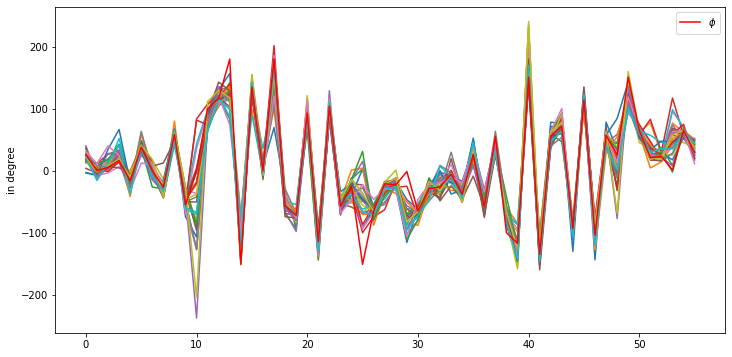

In [50]:
plt.figure(figsize=(12,6))
#plt.xlim(0,25)
#plt.ylim(-20,50)
#for i in range(0,rep):
    #plt.plot(v_pre_z[:][i])
plt.plot(v_pre_phi)
plt.plot(phi_teste,label=r"$\phi$",c = 'r')
plt.ylabel("in degree")
plt.legend(loc="best")
#plt.axhline(y=0)
plt.savefig('phi_fit_rep.png')

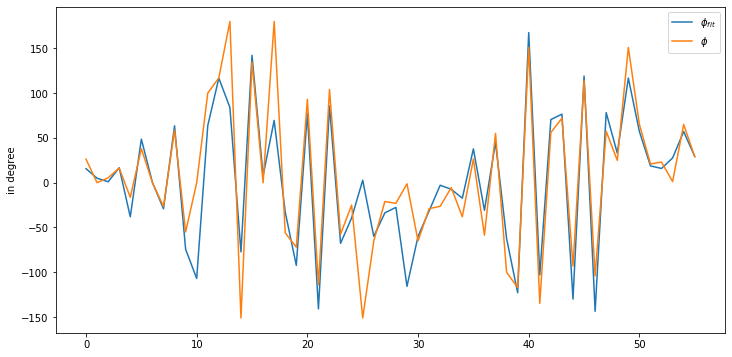

In [51]:
plt.figure(figsize=(12,6))
#plt.xlim(0,25)
#plt.ylim(-20,50)
#for i in range(0,rep):
    #plt.plot(v_pre_z[:][i])
plt.plot(v_pre_phi[:,0],label=r"$\phi_{fit}$")
plt.plot(phi_teste,label=r"$\phi$")
plt.ylabel("in degree")
plt.legend(loc="best")
#plt.axhline(y=0)
#plt.savefig('z_fit_teste.png')

In [52]:
plt.figure(figsize=(12,6))
for i in range(0,rep):
    diff = np.abs(np.abs(v_pre_phi[:][i])- np.abs(phi_teste))

diff.shape
np.max(diff)
#plt.plot(diff , c = 'r')

#plt.xlim(0,25)
#plt.ylim(-20,50)
#plt.plot(np.abs(val_prev_z-z_teste),label=r"$z_{fit}$")
#plt.ylabel("in degree")
#plt.legend(loc="best")
#plt.axhline(y=0)
#plt.savefig('diffphi.png')

154.9758944738669

<Figure size 864x432 with 0 Axes>